<a href="https://colab.research.google.com/github/Rchintalapati0111/Patient-Flow/blob/main/PatientFlow_Trends_in_Healthcare_Utilization_and_Insurance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sqlalchemy==1.4.46
!pip install pandasql
!pip install geopy
!pip install -U kaleido

## Objective:

## Healthcare Services Utilization and Trends:

To understand patient demographics, the utilization of healthcare services, and trends in medical conditions and treatments in a healthcare facility.

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import plotly.express as px
import seaborn as sns
import pandasql as ps #SQL on Pandas Dataframe
import matplotlib.pyplot as plt
import math
import re
import json
import os
from collections import Counter
import random

In [ ]:
from google.colab import files

# Upload the kaggle.json file from your local machine to Colab
uploaded = files.upload()

Saving healthcare_dataset.csv to healthcare_dataset (1).csv


In [ ]:
pip install --upgrade transformers

In [ ]:
df = pd.read_csv('healthcare_dataset.csv')

df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [ ]:
query = """
SELECT DISTINCT *
FROM df;
"""
df = ps.sqldf(query, locals())
print(df)

                      Name  Age  Gender Blood Type Medical Condition  \
0          Tiffany Ramirez   81  Female         O-          Diabetes   
1              Ruben Burns   35    Male         O+            Asthma   
2                Chad Byrd   61    Male         B-           Obesity   
3        Antonio Frederick   49    Male         B-            Asthma   
4      Mrs. Brandy Flowers   51    Male         O-         Arthritis   
...                    ...  ...     ...        ...               ...   
9995            James Hood   83    Male         A+           Obesity   
9996       Stephanie Evans   47  Female        AB+         Arthritis   
9997  Christopher Martinez   54    Male         B-         Arthritis   
9998           Amanda Duke   84    Male         A+         Arthritis   
9999             Eric King   20    Male         B-         Arthritis   

     Date of Admission             Doctor                   Hospital  \
0           2022-11-17     Patrick Parker           Wallace-Ham

## Data Cleaning Using Pandas:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [ ]:
df.describe()

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


## Finding The Missing Values in df:

In [ ]:
# Missing values:

df.isna().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

### Observation:

It can clearly be seen that there are no null values in the dataset.

## Outlier Detection and Removal:

In [ ]:
# Checking for Outliers:

def find_outliers(df):

    outliers = {}

    for column in df.columns:

        if df[column].dtype in ['int64', 'float64']:

            Q1 = df[column].quantile(0.25)

            Q3 = df[column].quantile(0.75)

            IQR = Q3 - Q1

            lower_bound = Q1 - 4 * IQR

            upper_bound = Q3 + 4 * IQR

            # Finding outliers:

            mask = (df[column] < lower_bound) | (df[column] > upper_bound)

            outliers[column] = df[column][mask]

    return outliers

# Find outliers in the DataFrame:

outliers = find_outliers(df)

# Display outliers for each column:

for column, values in outliers.items():

    print(f"Outliers in {column}: {len(values)}")

print(len(df))


Outliers in Age: 0
Outliers in Billing Amount: 0
Outliers in Room Number: 0
10000


In [ ]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


### Observation:

It can be seen that there are no outliers detected in df.

In [ ]:
# Mentioning underscore after every first word of the title in df:

df.columns = ['_'.join(col.split(' ', 1)) for col in df.columns]

print(df.head())

                  Name  Age  Gender Blood_Type Medical_Condition  \
0      Tiffany Ramirez   81  Female         O-          Diabetes   
1          Ruben Burns   35    Male         O+            Asthma   
2            Chad Byrd   61    Male         B-           Obesity   
3    Antonio Frederick   49    Male         B-            Asthma   
4  Mrs. Brandy Flowers   51    Male         O-         Arthritis   

  Date_of Admission          Doctor                   Hospital  \
0        2022-11-17  Patrick Parker           Wallace-Hamilton   
1        2023-06-01   Diane Jackson  Burke, Griffin and Cooper   
2        2019-01-09      Paul Baker                 Walton LLC   
3        2020-05-02  Brian Chandler                 Garcia Ltd   
4        2021-07-09  Dustin Griffin    Jones, Brown and Murray   

  Insurance_Provider  Billing_Amount  Room_Number Admission_Type  \
0           Medicare    37490.983364          146       Elective   
1   UnitedHealthcare    47304.064845          404      Eme

In [ ]:
# Renaming the name Date of Admission column to Admission_Date:

df.rename(columns = {'Date_of Admission' : 'Admission_date'}, inplace = True)


## Data Analysis and EDA:

## Patient Demographics Analysis:

Determine the distribution of patients by age and gender.

In [ ]:
query = """
SELECT Gender, AVG(Age) as Average_Age, COUNT(*) as Total
FROM df
GROUP BY Gender;
"""
age_count = ps.sqldf(query, locals())

print(age_count)

   Gender  Average_Age  Total
0  Female    51.608473   5075
1    Male    51.291168   4925


###Conclusion:

Based on the query results from the dataset, the average age of patients is similar across genders, with females having a slightly higher average age of approximately 51.61 years compared to males at approximately 51.29 years. The total number of patients in the dataset is almost evenly distributed between genders, with 5075 females and 4925 males. This suggests that the hospital admission rate and the age distribution among admitted patients do not significantly differ by gender.

### Plot:

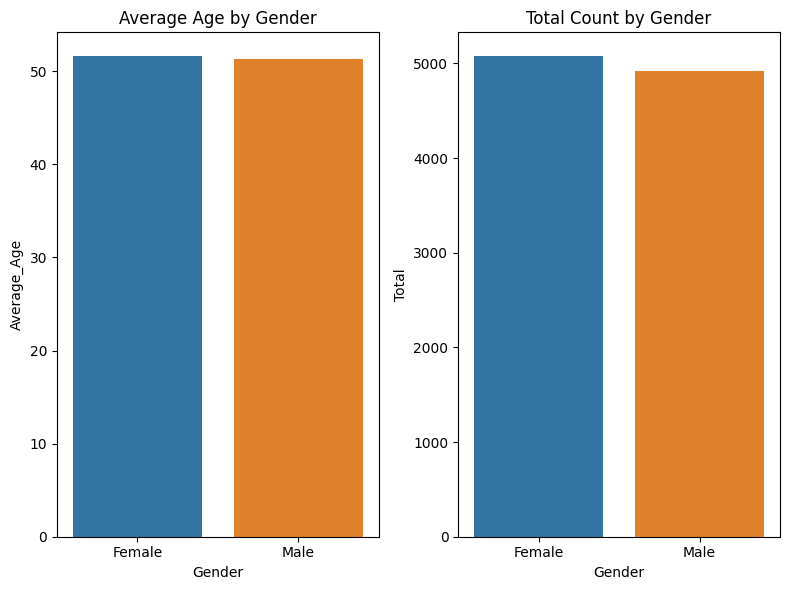

In [ ]:
# Plot figsize:

plt.figure(figsize=(8, 6))

# Average Age plot:

plt.subplot(1, 2, 1)

sns.barplot(x='Gender', y='Average_Age', data=age_count)

plt.title('Average Age by Gender')

# Plot for Total Count:

plt.subplot(1, 2, 2)

sns.barplot(x='Gender', y='Total', data=age_count)

plt.title('Total Count by Gender')

plt.tight_layout()

plt.show()

###Conclusion:

The bar charts illustrate the distribution of average age and total patient count by gender. The average age of female and male patients is nearly identical, with females being marginally older on average. The total count of patients is also very similar between genders, with a slightly higher number of female patients. These visual representations reinforce the data's indication that there is no significant gender disparity in terms of patient age and hospital admission rates within this dataset. The balance in numbers suggests equitable healthcare access and utilization among genders in this particular hospital setting.

In [ ]:
# Top 20 patient count according to the age of them:

query = """
SELECT Age, COUNT(*) as Total_patients
FROM df
GROUP BY Age
ORDER BY Total_patients DESC LIMIT 20;
"""
age_count_patients = ps.sqldf(query, locals())

print(age_count_patients)

    Age  Total_patients
0    59             175
1    78             174
2    31             172
3    35             169
4    20             169
5    57             168
6    61             166
7    18             164
8    75             163
9    74             162
10   29             162
11   36             161
12   42             160
13   81             159
14   53             159
15   38             159
16   51             158
17   48             158
18   72             155
19   23             155


###Conclusion:

The data shows a distribution of patient counts by age, with the highest number of patients being 59 years old, followed closely by ages 78 and 31. The ages with the most patients fall within a range from 18 to 81 years, indicating a broad span of ages among the top 20 patient counts. The patient count for these top ages ranges from 155 to 175, showing a relatively even distribution of patient counts across these ages. There is no significant concentration of patients in any specific age group, suggesting a diverse age range of patients accessing hospital care.

## Plot:

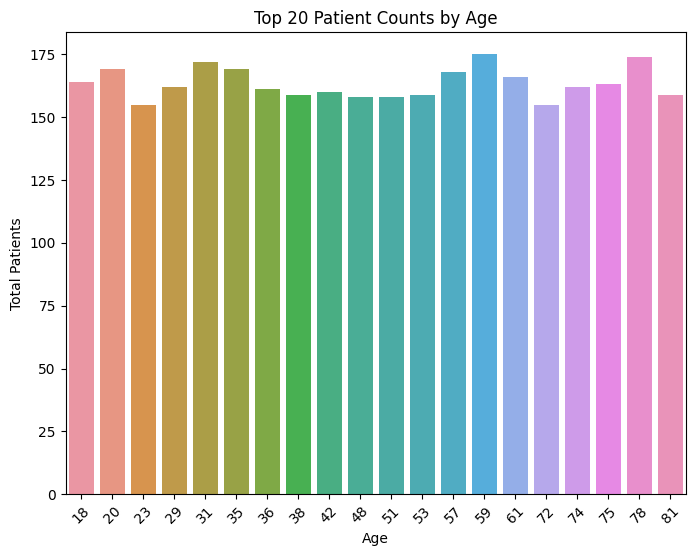

In [ ]:
# Plot figsize:

plt.figure(figsize=(8, 6))

sns.barplot(x='Age', y='Total_patients', data=age_count_patients)

plt.title('Top 20 Patient Counts by Age')

plt.xlabel('Age')

plt.ylabel('Total Patients')

plt.xticks(rotation=45)

plt.show()

###Conclusion:


The bar chart presents the top 20 patient counts by age, indicating a relatively uniform distribution among these age groups. The ages with the highest counts are 59, 78, and 31, with patient counts in the range of 155 to 175. The chart displays a diverse patient age range receiving hospital care, without significant skew towards any particular age group. This suggests that a wide span of age groups are equally represented in the hospital's patient demographic within the top counts.

In [ ]:
# Age distribution:

query = """
SELECT
    CASE
        WHEN Age BETWEEN 18 AND 35 THEN 'Young Adult'
        WHEN Age BETWEEN 36 AND 55 THEN 'Middle Aged Adult'
        ELSE 'Senior'
    END AS Age_Group,
    COUNT(*) as Total_Patients
FROM df
GROUP BY Age_Group
ORDER BY Total_Patients DESC;
"""
age_distribution = ps.sqldf(query, locals())

print(age_distribution)

           Age_Group  Total_Patients
0             Senior            4444
1  Middle Aged Adult            2902
2        Young Adult            2654


###Conclusion:

The data reveals that the largest age group among the patients is 'Senior', with 4444 patients, indicating that older individuals constitute the bulk of the hospital admissions. 'Middle Aged Adults' are the next largest group with 2902 patients, while 'Young Adults' are the least represented with 2654 patients. This distribution suggests that the hospital provides care predominantly to older populations. It may also reflect a higher need for medical services among seniors or demographic trends within the hospital's catchment area.

## Plot:

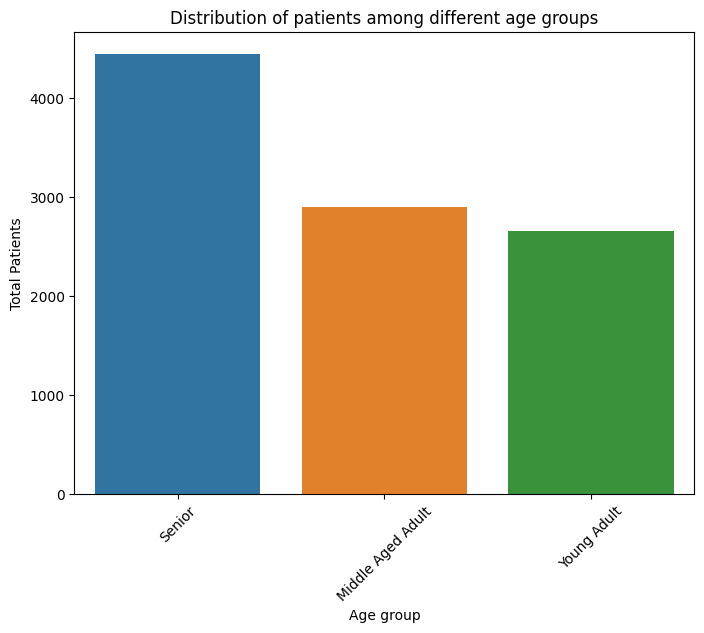

In [ ]:
# Plot figsize:

plt.figure(figsize=(8, 6))

sns.barplot(x='Age_Group', y='Total_Patients', data=age_distribution)

plt.title('Distribution of patients among different age groups')

plt.xlabel('Age group')

plt.ylabel('Total Patients')

plt.xticks(rotation=45)

plt.show()

###Conclusion:

The bar chart visualizes the distribution of patients across three age groups: Senior, Middle Aged Adult, and Young Adult. It highlights that the 'Senior' group has the highest number of patients, significantly outnumbering the other groups. The 'Middle Aged Adult' group follows, with 'Young Adult' being the smallest group. This graphical representation underscores the predominance of older individuals in the patient population and may indicate a greater need or higher frequency of healthcare utilization among the senior age group in this hospital's data.

In [ ]:
# Gender distribution among different age groups:

query = """
SELECT
    CASE
        WHEN Age BETWEEN 18 AND 35 THEN 'Young Adult'
        WHEN Age BETWEEN 36 AND 55 THEN 'Middle Aged Adult'
        ELSE 'Senior'
    END AS Age_Group,
    Gender,
    COUNT(*) as Total_Patients
FROM df
GROUP BY Age_Group, Gender
ORDER BY Age_Group, Gender;
"""
gender_age_distribution = ps.sqldf(query, locals())

print(gender_age_distribution)


           Age_Group  Gender  Total_Patients
0  Middle Aged Adult  Female            1458
1  Middle Aged Adult    Male            1444
2             Senior  Female            2284
3             Senior    Male            2160
4        Young Adult  Female            1333
5        Young Adult    Male            1321


###Conclusion:

The data indicates that within each age group, the gender distribution is fairly even. In the 'Middle Aged Adult' category, females slightly outnumber males, with 1458 to 1444 patients respectively. The 'Senior' group has a more pronounced difference, with females accounting for 2284 patients compared to 2160 males. Among 'Young Adults', females also slightly outnumber males, with 1333 to 1321 patients. Overall, females are more prevalent in each age group, suggesting a consistent pattern across the age spectrum in this hospital's patient demographic.

## Plot:

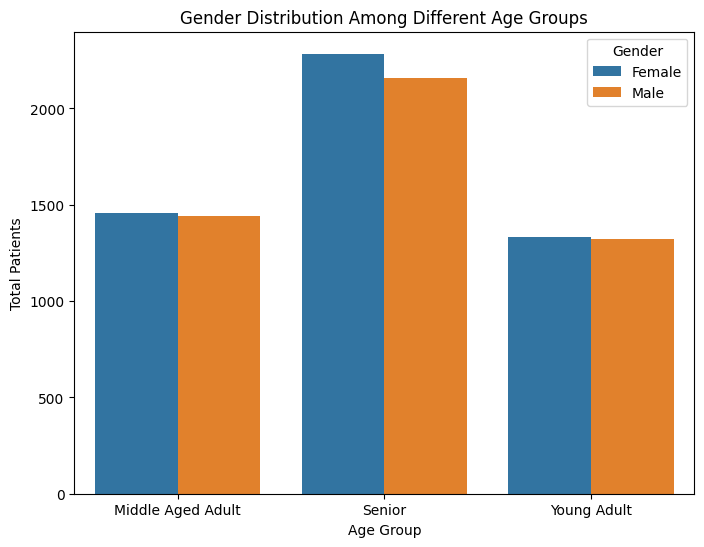

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Age_Group', y='Total_Patients', hue='Gender', data=gender_age_distribution)
plt.title('Gender Distribution Among Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Total Patients')
plt.show()

###Conclusion:


The bar chart compares the number of male and female patients across three age groups: Middle Aged Adult, Senior, and Young Adult. It shows that in each age group, the number of female patients is slightly higher than the number of male patients. The 'Senior' age group has the largest gap between genders, while the 'Middle Aged Adult' and 'Young Adult' categories show a very close count between male and female patients. The consistent pattern across all age groups suggests that females are marginally more represented in hospital admissions within this data set.

In [ ]:
# Medical distribution among different age groups:

query = """
SELECT
    CASE
        WHEN Age BETWEEN 18 AND 35 THEN 'Young Adult'
        WHEN Age BETWEEN 36 AND 55 THEN 'Middle-Aged Adult'
        ELSE 'Senior'
    END AS Age_Group,
    Medical_Condition,
    COUNT(*) as Condition_Count
FROM df
GROUP BY Age_Group, Medical_Condition
ORDER BY Age_Group, Condition_Count DESC;
"""
condition_by_age = ps.sqldf(query, locals())

print(condition_by_age)


            Age_Group Medical_Condition  Condition_Count
0   Middle-Aged Adult            Asthma              509
1   Middle-Aged Adult      Hypertension              492
2   Middle-Aged Adult            Cancer              487
3   Middle-Aged Adult         Arthritis              482
4   Middle-Aged Adult           Obesity              473
5   Middle-Aged Adult          Diabetes              459
6              Senior            Cancer              767
7              Senior            Asthma              749
8              Senior          Diabetes              742
9              Senior         Arthritis              733
10             Senior      Hypertension              727
11             Senior           Obesity              726
12        Young Adult      Hypertension              469
13        Young Adult            Asthma              450
14        Young Adult            Cancer              449
15        Young Adult         Arthritis              435
16        Young Adult          

###Conclusion:

The data presents the medical condition distribution among different age groups. In the 'Middle-Aged Adult' group, Asthma is the most common condition, followed closely by Hypertension and Cancer. Among 'Seniors', Cancer is the predominant condition, followed by Asthma and Diabetes. For 'Young Adults', Hypertension tops the list, with Asthma and Cancer nearly tied for the second spot. This suggests that chronic diseases such as Asthma, Hypertension, and Diabetes are prevalent across all age groups, with Cancer being particularly common in seniors. The conditions listed are significant health concerns for these age demographics in the hospital's patient population.

## Plot:

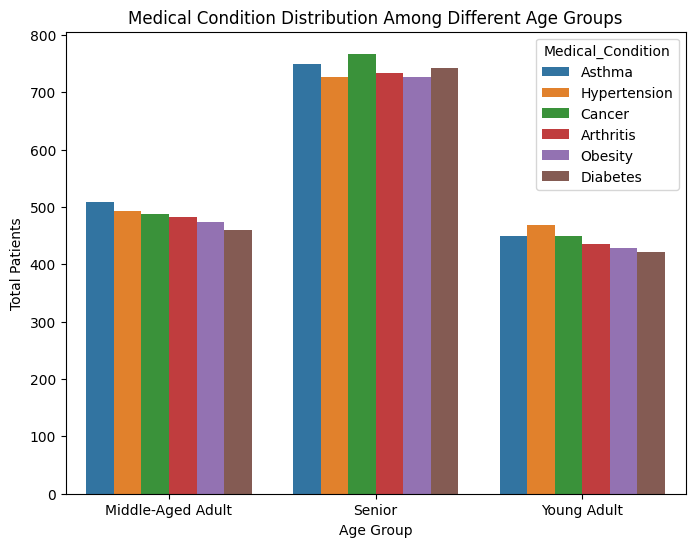

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Age_Group', y='Condition_Count', hue='Medical_Condition', data=condition_by_age)
plt.title('Medical Condition Distribution Among Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Total Patients')
plt.show()

###Conclusion:

The bar chart displays the medical condition distribution across three age groups: Middle-Aged Adult, Senior, and Young Adult. For Middle-Aged Adults, Asthma is the most frequent condition, while Cancer is most prevalent among Seniors, and Hypertension is the leading condition for Young Adults. The graph shows that while some conditions are consistently common across all age groups, such as Hypertension and Asthma, others like Cancer show an increased frequency in the Senior group. This visual representation emphasizes the variation in health issues prevalent in different age demographics, which could be indicative of the different health priorities and risks associated with each age group.

In [ ]:
# Creating a new column called Age Group:

df['Age_Group'] = df['Age'].apply(lambda x: 'Young Adult' if 18 <= x <= 35
                                  else 'Middle-Aged Adult' if 36 <= x <= 55
                                  else 'Senior')


In [ ]:
query = """
WITH CTE AS (
    SELECT Age_Group,
        Medical_Condition,
        COUNT(*) as Condition_Count,
        RANK() OVER (PARTITION BY Age_Group ORDER BY COUNT(*) DESC) as rank
    FROM df
    GROUP BY Age_Group, Medical_Condition
)
SELECT Age_Group, Medical_Condition, Condition_Count
FROM CTE
WHERE rank = 1;
"""
most_patients = ps.sqldf(query, locals())

print(most_patients)


           Age_Group Medical_Condition  Condition_Count
0  Middle-Aged Adult            Asthma              509
1             Senior            Cancer              767
2        Young Adult      Hypertension              469


###Conclusion:

The query has successfully identified the most prevalent medical condition within each age group in the dataset. For 'Middle-Aged Adults', Asthma is the most common condition with 509 cases. Among 'Seniors', Cancer has the highest count at 767 cases. In the 'Young Adult' category, Hypertension is the leading condition with 469 cases. These results highlight the primary health challenges faced by each age group, with Asthma being a significant concern for middle-aged adults, Cancer for seniors, and Hypertension for young adults within this patient population.

## Plot:

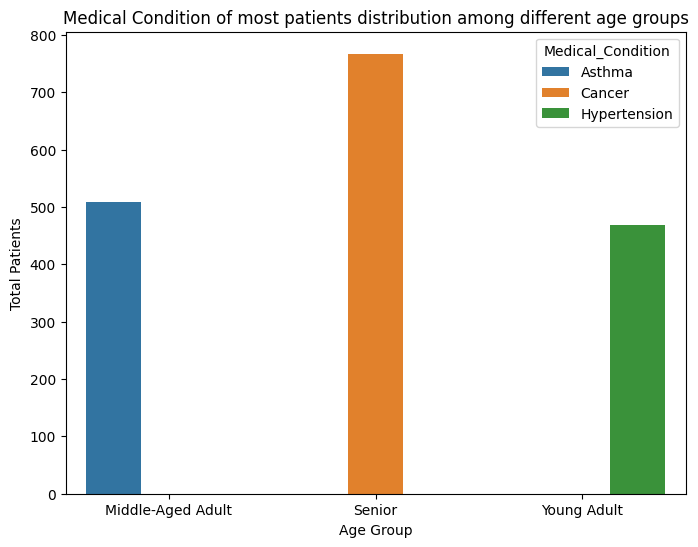

In [ ]:
# Bar Chart:

plt.figure(figsize=(8, 6))
sns.barplot(x='Age_Group', y='Condition_Count', hue='Medical_Condition', data=most_patients)
plt.title('Medical Condition of most patients distribution among different age groups')
plt.xlabel('Age Group')
plt.ylabel('Total Patients')
plt.show()

###Conclusion:


The bar chart presents the distribution of the most prevalent medical condition within three different age groups: Middle-Aged Adult, Senior, and Young Adult. The chart indicates that Asthma is the most common condition among Middle-Aged Adults with 509 patients, Cancer is the most frequent among Seniors with 767 patients, and Hypertension is the leading condition in Young Adults with 469 patients. This visualization highlights the primary medical concerns facing each age group and could be instrumental for healthcare providers in tailoring prevention and treatment strategies appropriate for each demographic.

In [ ]:
# Insurance providers distribution among different age groups:

query = """
SELECT
    CASE
        WHEN Age BETWEEN 18 AND 35 THEN 'Young Adult'
        WHEN Age BETWEEN 36 AND 55 THEN 'Middle-Aged Adult'
        ELSE 'Senior'
    END AS Age_Group,
    Insurance_Provider,
    COUNT(*) as Total_Patients
FROM df
GROUP BY Age_Group, Insurance_Provider
ORDER BY Age_Group, Total_Patients DESC;
"""
insurance_by_age = ps.sqldf(query, locals())

print(insurance_by_age)


            Age_Group Insurance_Provider  Total_Patients
0   Middle-Aged Adult              Cigna             634
1   Middle-Aged Adult           Medicare             576
2   Middle-Aged Adult   UnitedHealthcare             570
3   Middle-Aged Adult              Aetna             563
4   Middle-Aged Adult         Blue Cross             559
5              Senior              Aetna             928
6              Senior         Blue Cross             917
7              Senior   UnitedHealthcare             899
8              Senior              Cigna             853
9              Senior           Medicare             847
10        Young Adult         Blue Cross             556
11        Young Adult              Cigna             553
12        Young Adult              Aetna             534
13        Young Adult   UnitedHealthcare             509
14        Young Adult           Medicare             502


###Conclusion:

The data indicates that Aetna is the leading insurance provider for the 'Senior' age group with 928 patients, while Cigna is the most common among 'Middle-Aged Adults' with 634 patients. Blue Cross is the top insurance provider for 'Young Adults' with 556 patients. Medicare, commonly associated with older adults, is not the top provider for any group but remains significant across all age groups, especially among seniors. This suggests that while certain providers may have a higher concentration in specific age brackets, there is a relatively diverse distribution of insurance providers among the patients in each age category.

## Plot:

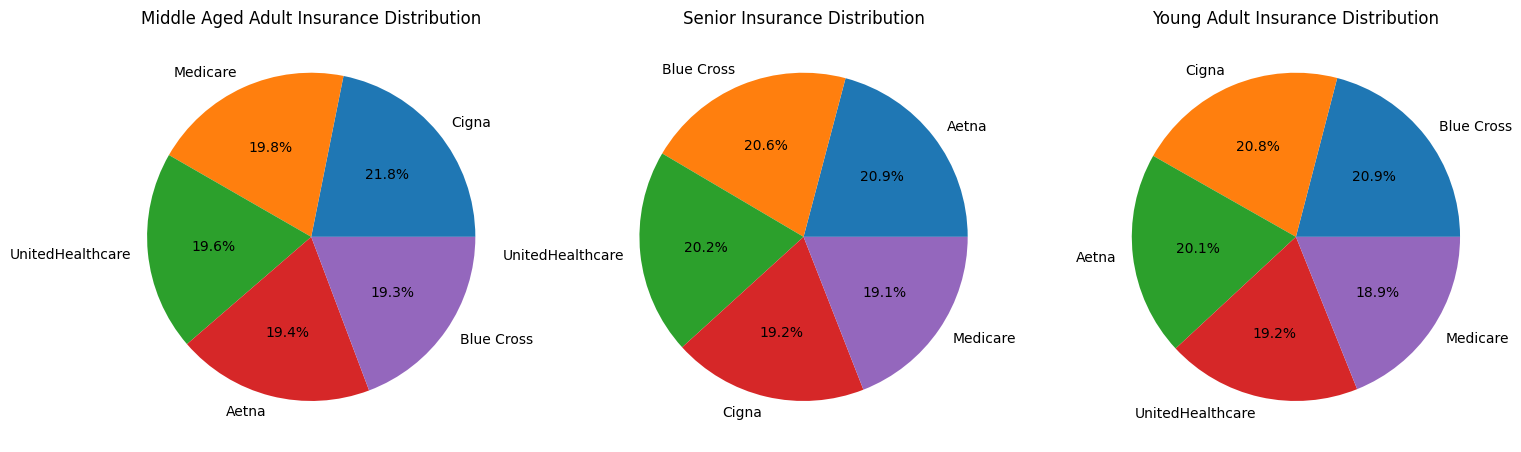

In [ ]:
# Pie chart:

middle_aged_adult = insurance_by_age[insurance_by_age['Age_Group'] == 'Middle-Aged Adult']

senior = insurance_by_age[insurance_by_age['Age_Group'] == 'Senior']

young_adult = insurance_by_age[insurance_by_age['Age_Group'] == 'Young Adult']

# Subplots:

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Middle-Aged Adult Pie Chart:

ax[0].pie(middle_aged_adult['Total_Patients'], labels=middle_aged_adult['Insurance_Provider'], autopct='%1.1f%%')

ax[0].set_title('Middle Aged Adult Insurance Distribution')

# Senior Pie Chart:

ax[1].pie(senior['Total_Patients'], labels=senior['Insurance_Provider'], autopct='%1.1f%%')

ax[1].set_title('Senior Insurance Distribution')

# Young Adult Pie Chart:

ax[2].pie(young_adult['Total_Patients'], labels=young_adult['Insurance_Provider'], autopct='%1.1f%%')

ax[2].set_title('Young Adult Insurance Distribution')

plt.show()

###Conclusion:

The pie charts illustrate the distribution of insurance providers among different age groups: Middle-Aged Adult, Senior, and Young Adult. In each age group, the charts show a relatively even spread among the different insurance providers. For Middle-Aged Adults, Cigna appears to have the largest share, while for Seniors, Aetna has the largest percentage. Blue Cross is slightly more common among Young Adults. These charts indicate that there is no dominant insurance provider across all age groups, reflecting a competitive market presence within this patient population. Overall, the distribution is quite balanced, with no single insurance provider overwhelmingly servicing any age group.

### Determine the distribution of patients by their blood groups.

In [ ]:
query = """
SELECT Blood_Type, COUNT(*) as count_of_patients_bg
FROM df
GROUP BY Blood_Type;
"""
bg_count = ps.sqldf(query, locals())

print(bg_count)

  Blood_Type  count_of_patients_bg
0         A+                  1241
1         A-                  1238
2        AB+                  1258
3        AB-                  1275
4         B+                  1244
5         B-                  1252
6         O+                  1248
7         O-                  1244


###Conclusion:


The data indicates a well-distributed count of patients across all blood types in the dataset. The numbers range from 1238 for type A- to 1275 for type AB-, showing a surprisingly even distribution given that some blood types are typically less common in the general population. Type AB- has the highest count of patients, which is notable because AB- is one of the rarest blood types. Types A+, AB+, B+, O+, and O- all have similar patient counts, hovering around the mid-1240s, while A-, B-, and O+ are also comparably represented. This distribution may not reflect the general prevalence of these blood types in the broader population but does represent the dataset at hand.

## Plot:

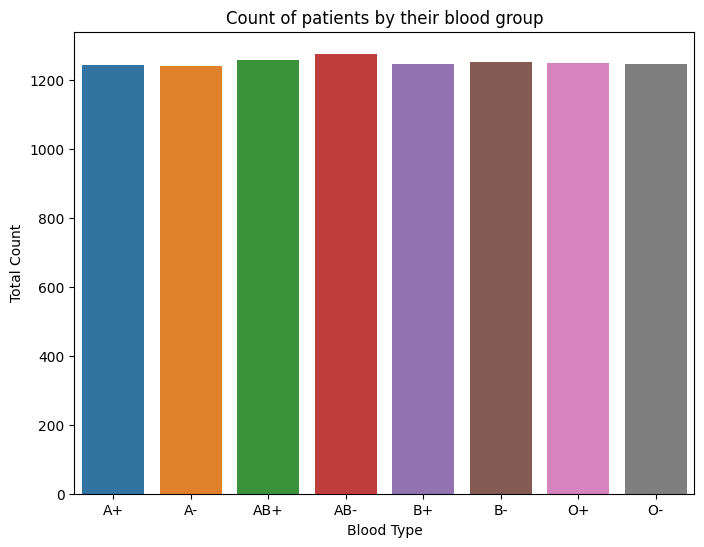

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Blood_Type', y='count_of_patients_bg', data=bg_count)
plt.title('Count of patients by their blood group')
plt.xlabel('Blood Type')
plt.ylabel('Total Count')
plt.show()

###Conclusion:

The bar chart shows the distribution of patients by their blood group within the dataset. All blood types are almost equally represented, with counts ranging closely between 1238 and 1275 patients. This uniform distribution is atypical considering the varied prevalence of blood types in the general population, where types O and A are usually more common than B and AB. The chart highlights that in this specific dataset, each blood type has a similar number of patients, which is an interesting observation that might be explored further for underlying reasons or patterns.

In [ ]:
# Let us see the above analysis in terms of different genders:

query = """
SELECT Blood_Type, Gender, COUNT(*) as count_of_patients_bg
FROM df
GROUP BY Gender, Blood_Type
ORDER BY Blood_Type ASC;
"""
bgg_count = ps.sqldf(query, locals())

print(bgg_count)

   Blood_Type  Gender  count_of_patients_bg
0          A+  Female                   629
1          A+    Male                   612
2          A-  Female                   633
3          A-    Male                   605
4         AB+  Female                   637
5         AB+    Male                   621
6         AB-  Female                   671
7         AB-    Male                   604
8          B+  Female                   640
9          B+    Male                   604
10         B-  Female                   635
11         B-    Male                   617
12         O+  Female                   641
13         O+    Male                   607
14         O-  Female                   589
15         O-    Male                   655


###Conclusion:

The data breaks down the count of patients by blood type and gender. It shows a fairly even distribution between female and male patients across all blood types. For most blood types, females have a slightly higher count than males, with the exception of blood type O-, where males have a higher count (655) compared to females (589). Blood type AB- has the highest number of female patients (671), while the lowest female count is for blood type O- (589). For male patients, the highest count is for blood type O- (655) and the lowest for blood type A- (605). This gender-specific distribution across different blood types may reflect the overall patient demographics or specific patterns in the hospital's admissions.

## Plot:

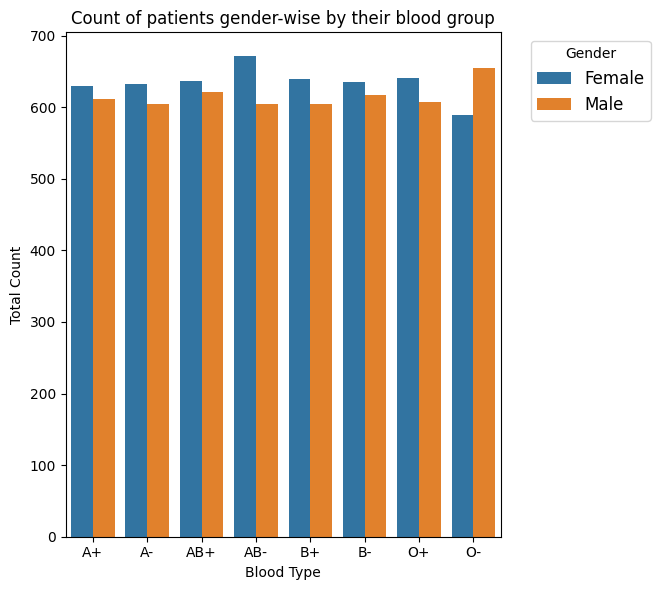

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Blood_Type', y='count_of_patients_bg', hue = 'Gender', data=bgg_count)
plt.title('Count of patients gender-wise by their blood group')
plt.xlabel('Blood Type')
plt.ylabel('Total Count')
plt.legend(title='Gender', fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

###Conclusion:

The bar chart depicts the distribution of patients by gender within each blood group. Across all blood types, the number of female and male patients is quite balanced, with females slightly outnumbering males in most groups. Notably, in the O- blood type category, male patients exceed female patients, which is an exception to the trend seen in other groups. The relatively even distribution across genders within blood groups suggests that gender does not have a significant influence on the blood type distribution in this patient population. The data representation could provide insights into the gender ratios for each blood type within this specific healthcare setting.

## Medical Conditions of Patients:

In [ ]:
query = """
SELECT
    Medical_Condition,
    SUM(CASE WHEN Gender = 'Female' THEN 1 ELSE 0 END) AS Female_Count,
    SUM(CASE WHEN Gender = 'Male' THEN 1 ELSE 0 END) AS Male_Count,
    COUNT(*) AS Total_Count
FROM df
GROUP BY Medical_Condition
ORDER BY Total_Count DESC;
"""
mc_count = ps.sqldf(query, locals())

print(mc_count)

  Medical_Condition  Female_Count  Male_Count  Total_Count
0            Asthma           874         834         1708
1            Cancer           887         816         1703
2      Hypertension           836         852         1688
3         Arthritis           815         835         1650
4           Obesity           838         790         1628
5          Diabetes           825         798         1623


###Conclusion:


The data highlights the distribution of six medical conditions by gender. Asthma has the highest total count of patients (1708), with females (874) slightly outnumbering males (834). Cancer follows closely with a total of 1703 patients, again with more females (887) than males (816). Hypertension shows an almost equal distribution between genders but with slightly more male patients (852) than female (836). Arthritis and Diabetes both have more female patients than male, while Obesity has a total count of 1628 with more females (838) than males (790). This suggests a slightly higher prevalence of these conditions among females, except for Hypertension, which is marginally more common in males within this dataset.

## Plot:

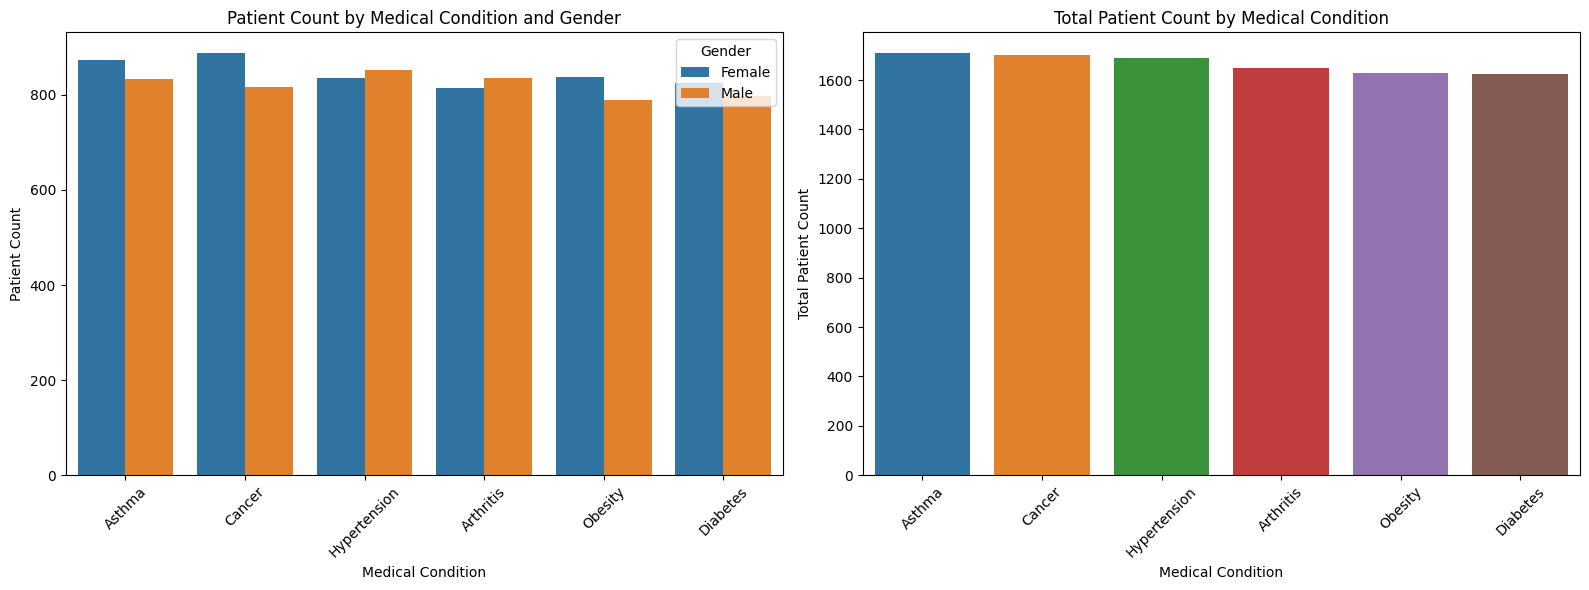

In [ ]:
# Plot figsize:


plt.figure(figsize=(16, 6))

# First Subplot:

plt.subplot(1, 2, 1)


df_melted = mc_count.melt(id_vars='Medical_Condition', value_vars=['Female_Count', 'Male_Count'],
                    var_name='Gender', value_name='Count')

df_melted['Gender'] = df_melted['Gender'].str.replace('_Count', '')

sns.barplot(data=df_melted, x='Medical_Condition', y='Count', hue='Gender')

plt.title('Patient Count by Medical Condition and Gender')

plt.xlabel('Medical Condition')

plt.ylabel('Patient Count')

plt.xticks(rotation=45)

# Second Subplot:

plt.subplot(1, 2, 2)

sns.barplot(x='Medical_Condition', y='Total_Count', data=mc_count)

plt.title('Total Patient Count by Medical Condition')

plt.xlabel('Medical Condition')

plt.ylabel('Total Patient Count')

plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

###Conclusion:

The provided bar charts represent patient counts by medical condition, divided by gender and then in total. In the first chart, we see that for conditions like Asthma, Cancer, and Arthritis, female patients outnumber male patients. However, for Hypertension, male patients are slightly more than female patients. The second chart aggregates these counts to show the total number of patients for each medical condition, regardless of gender. Asthma and Cancer have the highest patient counts, closely followed by Hypertension. These visualizations emphasize not only the prevalence of these conditions within the dataset but also the gender distribution for each condition, highlighting any gender-related tendencies in disease prevalence.

In [ ]:
# Top 3 medications for each medical condition:

query = """
WITH CTE As (
  SELECT Medical_Condition, Medication, COUNT(*) AS Count_required,
  RANK() OVER (PARTITION BY Medical_Condition ORDER BY COUNT(*) DESC) as rank
  from df
  GROUP BY Medical_Condition, Medication

)

SELECT Medical_Condition, Medication, Count_required
from CTE
WHERE rank <= 3;

"""

top_med = ps.sqldf(query, locals())

print(top_med)


   Medical_Condition   Medication  Count_required
0          Arthritis   Penicillin             366
1          Arthritis  Paracetamol             324
2          Arthritis      Aspirin             322
3             Asthma      Aspirin             370
4             Asthma      Lipitor             346
5             Asthma   Penicillin             342
6             Cancer   Penicillin             364
7             Cancer    Ibuprofen             352
8             Cancer      Lipitor             350
9           Diabetes      Aspirin             335
10          Diabetes   Penicillin             334
11          Diabetes  Paracetamol             327
12      Hypertension      Lipitor             356
13      Hypertension   Penicillin             346
14      Hypertension    Ibuprofen             335
15           Obesity  Paracetamol             332
16           Obesity    Ibuprofen             328
17           Obesity   Penicillin             327


###Conclusion:

The data lists the top three medications prescribed for each medical condition based on their count of prescriptions. For Arthritis, Penicillin leads with 366 prescriptions, followed by Paracetamol and Aspirin. Asthma patients are most frequently prescribed Aspirin, Lipitor, and Penicillin. Among Cancer patients, Penicillin is also the most prescribed medication, with Ibuprofen and Lipitor close behind. Diabetes treatments commonly involve Aspirin, Penicillin, and Paracetamol. For Hypertension, Lipitor is the most prescribed, followed by Penicillin and Ibuprofen. Finally, Obesity treatments often include Paracetamol, Ibuprofen, and Penicillin. This reflects a common use of these medications across multiple conditions within the dataset.

## Plot:

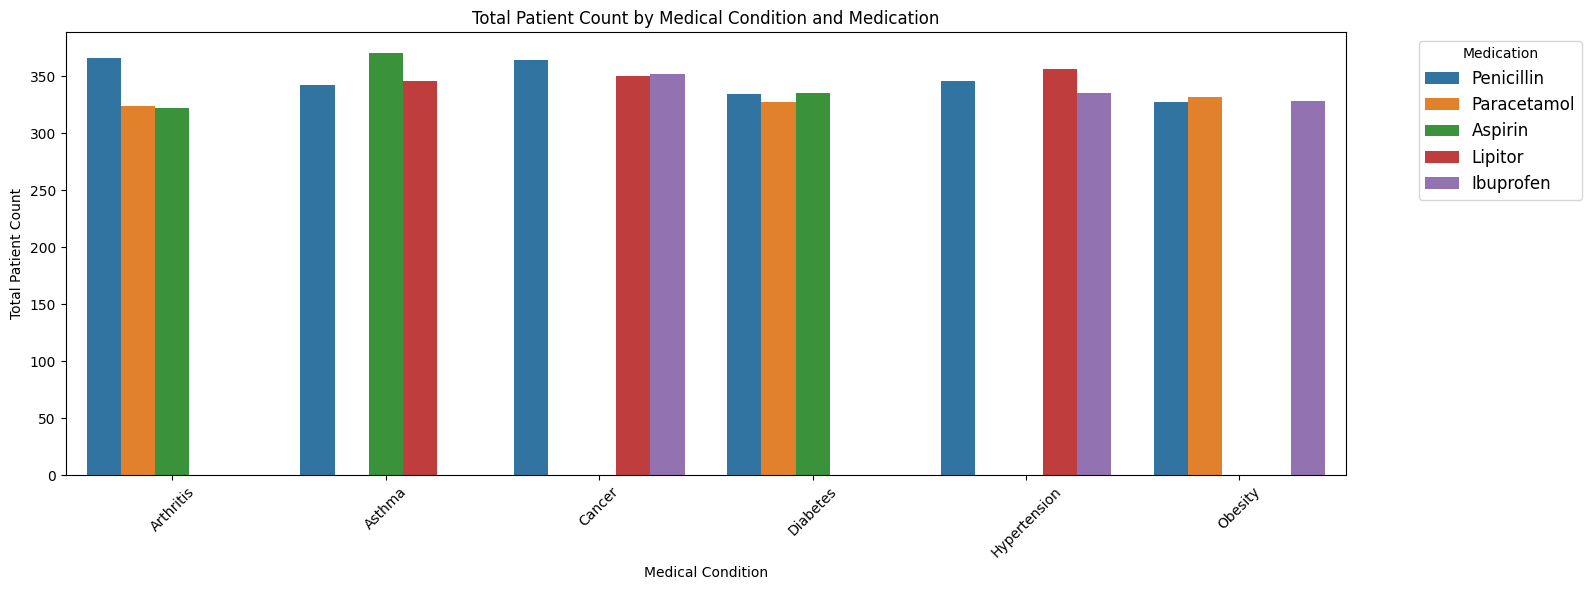

In [ ]:
plt.figure(figsize=(16, 6))

sns.barplot(x='Medical_Condition', y='Count_required', hue ='Medication', data=top_med)

plt.title('Total Patient Count by Medical Condition and Medication')

plt.xlabel('Medical Condition')

plt.ylabel('Total Patient Count')

plt.xticks(rotation=45)

plt.legend(title='Medication', fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.show()

###Conclusion:

The bar chart showcases the total patient count by medical condition, categorized by the top three medications prescribed for each condition. It clearly indicates that Penicillin is commonly prescribed across multiple conditions, such as Arthritis, Asthma, and Cancer. Aspirin appears to be a top medication for both Asthma and Diabetes. Lipitor is frequently used for Asthma and Hypertension, and Paracetamol is a common choice for Arthritis and Obesity. Ibuprofen is among the top three for Cancer and Obesity. This visualization helps to understand the medication patterns for various conditions and can be useful for healthcare professionals to observe prescription trends and for patients to be aware of common treatments for their conditions.

In [ ]:
# Relationship between the length of stay and medical conditions:

query = """
SELECT
    Medical_Condition,
    AVG(JULIANDAY(Discharge_Date) - JULIANDAY(Admission_date)) as Average_Stay_Length
FROM df
GROUP BY Medical_Condition
ORDER BY Average_Stay_Length DESC;
"""

rel_med = ps.sqldf(query, locals())

print(rel_med)


  Medical_Condition  Average_Stay_Length
0         Arthritis            15.990303
1          Diabetes            15.574245
2            Asthma            15.481265
3            Cancer            15.479742
4      Hypertension            15.430095
5           Obesity            15.421990


###Conclusion:

The query results show the average length of stay in days for patients with different medical conditions. Patients with Arthritis had the longest average stay at approximately 16 days. Diabetes patients had a slightly shorter stay, averaging around 15.57 days. Asthma and Cancer patients had very similar lengths of stay, with averages around 15.48 days. Hypertension patients had an average stay of about 15.43 days, and Obesity patients had the shortest average stay among the listed conditions, at approximately 15.42 days. These results indicate that the differences in the average length of stay among these conditions are minimal, suggesting that each condition typically requires a similar duration of hospital care within this dataset.

## Plot:

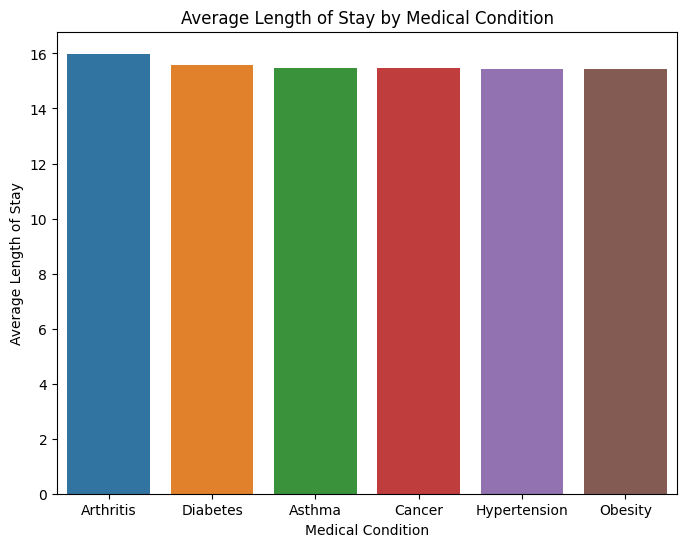

In [ ]:
plt.figure(figsize=(8, 6))

sns.barplot(x = 'Medical_Condition', y = 'Average_Stay_Length', data = rel_med)

plt.title('Average Length of Stay by Medical Condition')

plt.xlabel('Medical Condition')

plt.ylabel('Average Length of Stay')

plt.show()

###Conclusion:


The bar chart illustrates the average length of stay in the hospital for various medical conditions. Arthritis patients have the longest average stay at just under 16 days. Patients with Diabetes and Asthma have slightly shorter stays, averaging around 15.5 days. Cancer, Hypertension, and Obesity have the shortest stays, but all average above 15 days. These figures suggest that all these conditions typically require at least two weeks of hospital care, indicating a substantial level of treatment and recovery time for patients with these diagnoses. This information could be vital for hospital resource planning and patient counseling regarding expected treatment durations.

In [ ]:
# Relationship between Medical Conditions and their results:

query = """
SELECT Medical_Condition, Test_Results, COUNT(*) as Result_Count
FROM df
GROUP BY Medical_Condition, Test_Results
ORDER BY Medical_Condition, Result_Count DESC;
"""

result_med = ps.sqldf(query, locals())

print(result_med)

   Medical_Condition  Test_Results  Result_Count
0          Arthritis      Abnormal           555
1          Arthritis  Inconclusive           553
2          Arthritis        Normal           542
3             Asthma      Abnormal           623
4             Asthma  Inconclusive           551
5             Asthma        Normal           534
6             Cancer      Abnormal           577
7             Cancer        Normal           570
8             Cancer  Inconclusive           556
9           Diabetes        Normal           544
10          Diabetes  Inconclusive           542
11          Diabetes      Abnormal           537
12      Hypertension      Abnormal           602
13      Hypertension  Inconclusive           554
14      Hypertension        Normal           532
15           Obesity      Abnormal           562
16           Obesity        Normal           545
17           Obesity  Inconclusive           521


###Conclusion:

The data reflects the relationship between medical conditions and test results within the dataset. For Arthritis, the distribution of test results is relatively even across 'Abnormal', 'Inconclusive', and 'Normal' categories. Asthma shows a higher incidence of 'Abnormal' results, followed by 'Inconclusive' and 'Normal'. Similarly, 'Abnormal' results are most frequent for patients with Cancer and Hypertension, indicating a possible trend where these conditions more often result in abnormal test outcomes. Diabetes has a slightly higher count of 'Normal' results, whereas Obesity also presents 'Abnormal' results as the most common outcome. This data could be used to infer the likelihood of test result outcomes associated with certain medical conditions in this specific population.

## Plot:

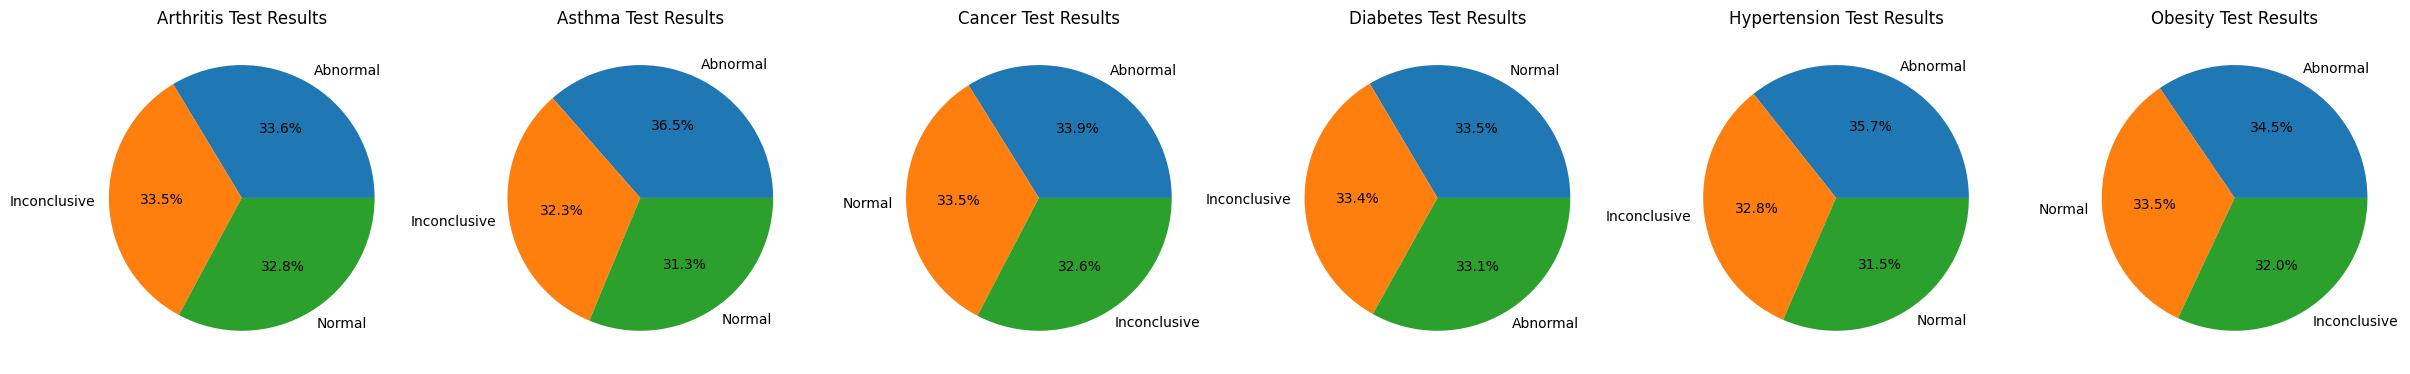

In [ ]:
# Pie chart:

Arthritis_ts = result_med[result_med['Medical_Condition'] == 'Arthritis']

Asthma_ts = result_med[result_med['Medical_Condition'] == 'Asthma']

Cancer_ts = result_med[result_med['Medical_Condition'] == 'Cancer']

Diabetes_ts = result_med[result_med['Medical_Condition'] == 'Diabetes']

Hypertension_ts = result_med[result_med['Medical_Condition'] == 'Hypertension']

Obesity_ts = result_med[result_med['Medical_Condition'] == 'Obesity']

# Subplots:

fig, ax = plt.subplots(1, 6, figsize=(30, 10))

# Arthritis Pie Chart:

ax[0].pie(Arthritis_ts['Result_Count'], labels= Arthritis_ts['Test_Results'], autopct='%1.1f%%')

ax[0].set_title('Arthritis Test Results')

# Arthritis Pie Chart:

ax[1].pie(Asthma_ts['Result_Count'], labels= Asthma_ts['Test_Results'], autopct='%1.1f%%')

ax[1].set_title('Asthma Test Results')

# Cancer Pie Chart:

ax[2].pie(Cancer_ts['Result_Count'], labels= Cancer_ts['Test_Results'], autopct='%1.1f%%')

ax[2].set_title('Cancer Test Results')

# Diabetes Pie Chart:

ax[3].pie(Diabetes_ts['Result_Count'], labels= Diabetes_ts['Test_Results'], autopct='%1.1f%%')

ax[3].set_title('Diabetes Test Results')

# Hypertension Pie Chart:

ax[4].pie(Hypertension_ts['Result_Count'], labels= Hypertension_ts['Test_Results'], autopct='%1.1f%%')

ax[4].set_title('Hypertension Test Results')

# Obesity Pie Chart:

ax[5].pie(Obesity_ts['Result_Count'], labels= Obesity_ts['Test_Results'], autopct='%1.1f%%')

ax[5].set_title('Obesity Test Results')

plt.show()

###Conclusion:

The pie charts provide a visual comparison of test results for various medical conditions. Each chart depicts the proportion of normal, abnormal, and inconclusive test results for Arthritis, Asthma, Cancer, Diabetes, Hypertension, and Obesity.

Arthritis Test Results: The distribution is nearly even across all three result types, with abnormal and inconclusive results slightly more frequent than normal results.

Asthma Test Results: Abnormal results are the most common, followed by inconclusive and normal results, indicating a higher likelihood of positive test findings.

Cancer Test Results: Similar to Arthritis, the distribution is quite even, with a marginally higher incidence of abnormal results.

Diabetes Test Results: There is an equal distribution of normal and inconclusive results, with abnormal results being slightly less common.

Hypertension Test Results: Abnormal results are the most common, suggesting a tendency towards positive test findings in patients with Hypertension.

Obesity Test Results: Abnormal results are again the most common, followed by normal and inconclusive results.

These charts highlight the testing patterns associated with these conditions, which could be useful for medical professionals in understanding the likelihood of various test outcomes and for patients to know what kind of test results might be expected with their medical condition.

## Admission Type of Patients:

In [ ]:
query = """
SELECT
    Admission_Type,
    SUM(CASE WHEN Gender = 'Female' THEN 1 ELSE 0 END) AS Female_Count,
    SUM(CASE WHEN Gender = 'Male' THEN 1 ELSE 0 END) AS Male_Count,
    COUNT(*) AS Total_Count
FROM df
GROUP BY Admission_Type
ORDER BY Total_Count DESC;
"""
at_count = ps.sqldf(query, locals())

print(at_count)

  Admission_Type  Female_Count  Male_Count  Total_Count
0         Urgent          1734        1657         3391
1      Emergency          1701        1666         3367
2       Elective          1640        1602         3242


###Conclusion:

The data shows the distribution of admission types by gender. 'Urgent' admissions are the most common with 3391 total cases, with females (1734) slightly outnumbering males (1657). 'Emergency' admissions are a close second, totaling 3367, with a near-equal distribution between females (1701) and males (1666). 'Elective' admissions are the least common at 3242 total cases, again with slightly more females (1640) than males (1602). This indicates that for all types of admissions, female patients are slightly more prevalent than male patients within this dataset. Urgent admissions are the most frequent, suggesting a higher incidence of acute conditions or situations requiring immediate medical attention.

## Plot:

Text(0.5, 1.0, 'Total Count of Patients by Admission Type')

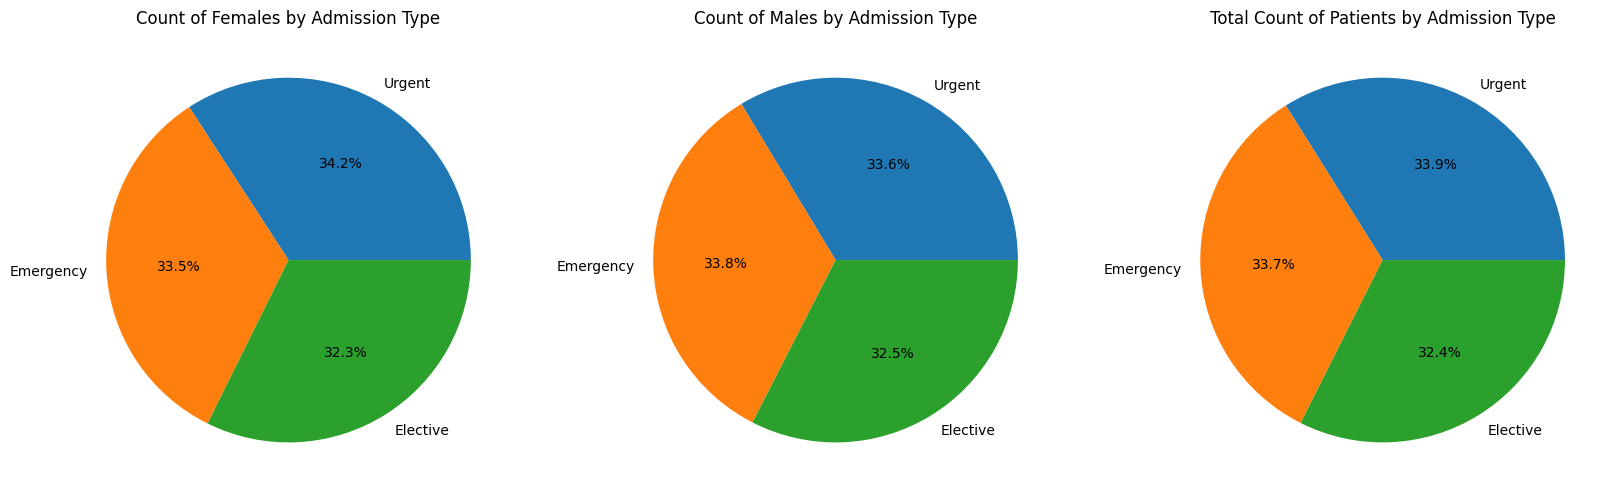

In [ ]:
# Subplots:

fig, ax = plt.subplots(1, 3, figsize=(20, 10))

# Arthritis Pie Chart:

ax[0].pie(at_count['Female_Count'], labels= at_count['Admission_Type'], autopct='%1.1f%%')

ax[0].set_title('Count of Females by Admission Type')

ax[1].pie(at_count['Male_Count'], labels= at_count['Admission_Type'], autopct='%1.1f%%')

ax[1].set_title('Count of Males by Admission Type')

ax[2].pie(at_count['Total_Count'], labels= at_count['Admission_Type'], autopct='%1.1f%%')

ax[2].set_title('Total Count of Patients by Admission Type')


###Conclusion:

The pie charts provide a visual summary of the count of patients by admission type, broken down by gender and then overall. Here are some key takeaways:

Count of Females by Admission Type: The chart suggests that Urgent admissions are slightly more common for females, followed closely by Emergency and then Elective admissions.

Count of Males by Admission Type: Similar to females, males also have the highest count in Urgent admissions, with a very close number in Emergency admissions and the least in Elective.

Total Count of Patients by Admission Type: When combining both genders, Urgent admissions make up the largest proportion, indicating that most admissions are of an urgent nature. Emergency and Elective admissions follow closely, with a very slight edge for Emergency admissions.

These distributions show that the urgency of admissions is a common trend across both genders, with Urgent and Emergency admissions being more frequent than Elective ones. This information can be crucial for hospital resource allocation and preparedness for admission types.

## Medication and Treatment Trends:

In [ ]:
query = """
SELECT Medication, COUNT(*) as Total
FROM df
GROUP BY Medication
ORDER BY Total DESC;
"""
medicine_count = ps.sqldf(query, locals())

print(medicine_count)

    Medication  Total
0   Penicillin   2079
1      Lipitor   2015
2    Ibuprofen   1976
3      Aspirin   1968
4  Paracetamol   1962


###Conclusion:

The query has yielded the count of prescriptions for each medication in the dataset. Penicillin is the most prescribed drug with 2079 prescriptions. Lipitor is a close second with 2015 prescriptions. Ibuprofen comes next with 1976, followed by Aspirin with 1968, and Paracetamol with 1962 prescriptions. This distribution suggests that these medications are the most commonly used in the patient population of this dataset, which may reflect their broad applicability to a range of conditions.

## Plot:

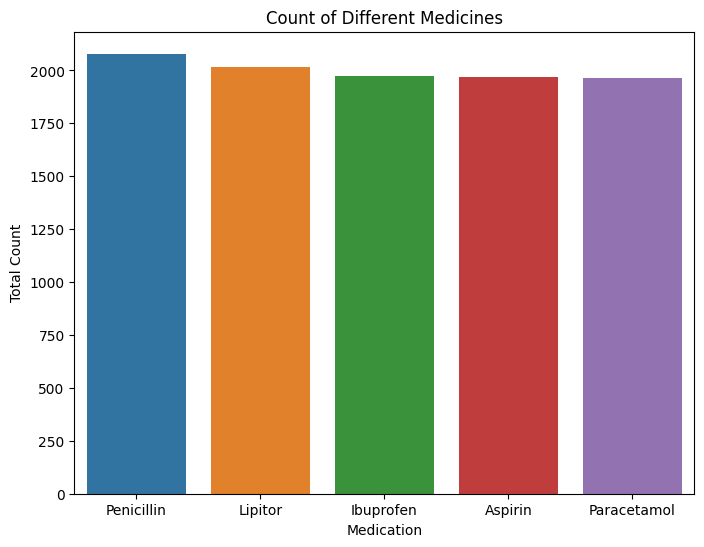

In [ ]:
plt.figure(figsize=(8, 6))

sns.barplot(x = 'Medication', y = 'Total', data = medicine_count)

plt.title('Count of Different Medicines')

plt.xlabel('Medication')

plt.ylabel('Total Count')

plt.show()

###Conclusion:

The bar chart depicts the total counts of different medications prescribed within the dataset. Penicillin is the most commonly prescribed medication, followed by Lipitor, Ibuprofen, Aspirin, and Paracetamol. The counts for each medication are relatively close, ranging from around 1960 to just over 2070, indicating that these medications are frequently used in the treatment of patients in the dataset. This could suggest a commonality in the types of conditions treated or a preference for these medications in the healthcare setting from which the data is drawn.

## Hospital Stay and Billing Analysis:

In [ ]:
query = """

SELECT Medical_Condition, AVG(Billing_Amount) as Average_Billing
FROM df
GROUP BY Medical_Condition;
"""
medical_condition = ps.sqldf(query, locals())

print(medical_condition)

  Medical_Condition  Average_Billing
0         Arthritis     25187.631255
1            Asthma     25416.869895
2            Cancer     25539.096133
3          Diabetes     26060.116129
4      Hypertension     25198.033973
5           Obesity     25720.842683


###Conclusion:


The query results show the average billing amount associated with different medical conditions. Diabetes has the highest average billing at \$26,060.12, possibly indicating more extensive treatment or longer hospital stays. Cancer and Obesity also have high average billing amounts, at \$25,539.10 and \$25,720.84, respectively. Asthma follows closely at \$25,416.87. Arthritis and Hypertension have the lowest average billing amounts, at \$25,187.63 and \$25,198.03, respectively. These figures suggest that some conditions may incur higher healthcare costs than others, which could be due to the complexity of treatment, medication costs, or required medical procedures.

## Plot:

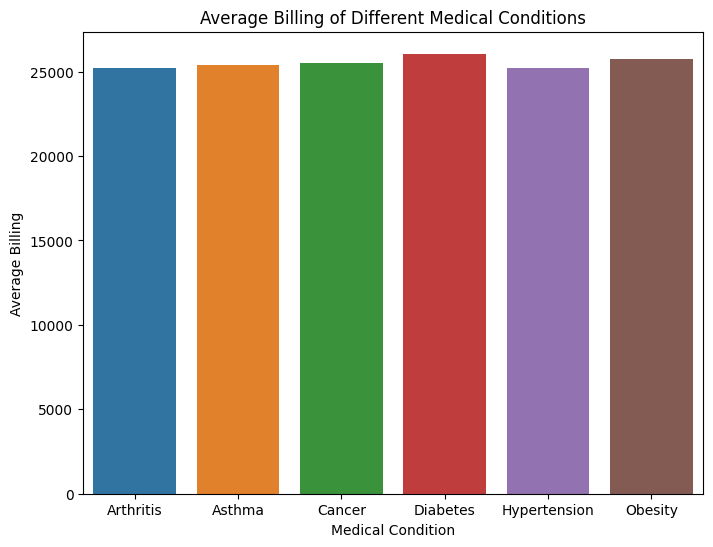

In [ ]:
plt.figure(figsize=(8, 6))

sns.barplot(x = 'Medical_Condition', y = 'Average_Billing', data = medical_condition)

plt.title('Average Billing of Different Medical Conditions')

plt.xlabel('Medical Condition')

plt.ylabel('Average Billing')

plt.show()

###Conclusion:

The bar chart visualizes the average billing amounts for various medical conditions. Diabetes is shown to have the highest average billing, followed closely by Obesity, Cancer, and Asthma, indicating these conditions may be associated with higher treatment costs. Arthritis and Hypertension have the lowest average billing in the comparison, but still significant amounts. This visual representation helps in understanding the potential financial implications of treating different medical conditions and might be reflective of the intensity of medical care and resources required for each condition.

In [ ]:
# Let us find the distribution of average billing among different genders:

query = """

SELECT Medical_Condition,
    SUM(CASE WHEN Gender = 'Female' THEN 1 ELSE 0 END) AS Female_Count,
    SUM(CASE WHEN Gender = 'Male' THEN 1 ELSE 0 END) AS Male_Count,
    AVG(Billing_Amount) as Average_Billing
FROM df
GROUP BY Medical_Condition;
"""
medical_condition_gender = ps.sqldf(query, locals())

print(medical_condition_gender)


  Medical_Condition  Female_Count  Male_Count  Average_Billing
0         Arthritis           815         835     25187.631255
1            Asthma           874         834     25416.869895
2            Cancer           887         816     25539.096133
3          Diabetes           825         798     26060.116129
4      Hypertension           836         852     25198.033973
5           Obesity           838         790     25720.842683


###Conclusion:


The data shows the distribution of average billing amounts for various medical conditions, alongside the gender count for each condition. Diabetes has the highest average billing amount at \$26,060.12, with females accounting for 825 cases and males for 798 cases. Obesity also has a high average billing amount at \$25,720.84, with more female cases (838) than male (790). Cancer and Asthma have nearly equal numbers of female and male cases, with average billings of \$25,539.10 and \$25,416.87, respectively. Arthritis and Hypertension have the lowest average billings of \$25,187.63 and \$25,198.03, respectively, with a slightly higher number of male cases for Arthritis and a higher number of female cases for Hypertension. This data suggests that the cost of treatment may vary by medical condition but does not show a significant difference in average billing between genders for each condition.

## Plot:

Text(0.5, 1.0, 'Count of males by Medical Condition')

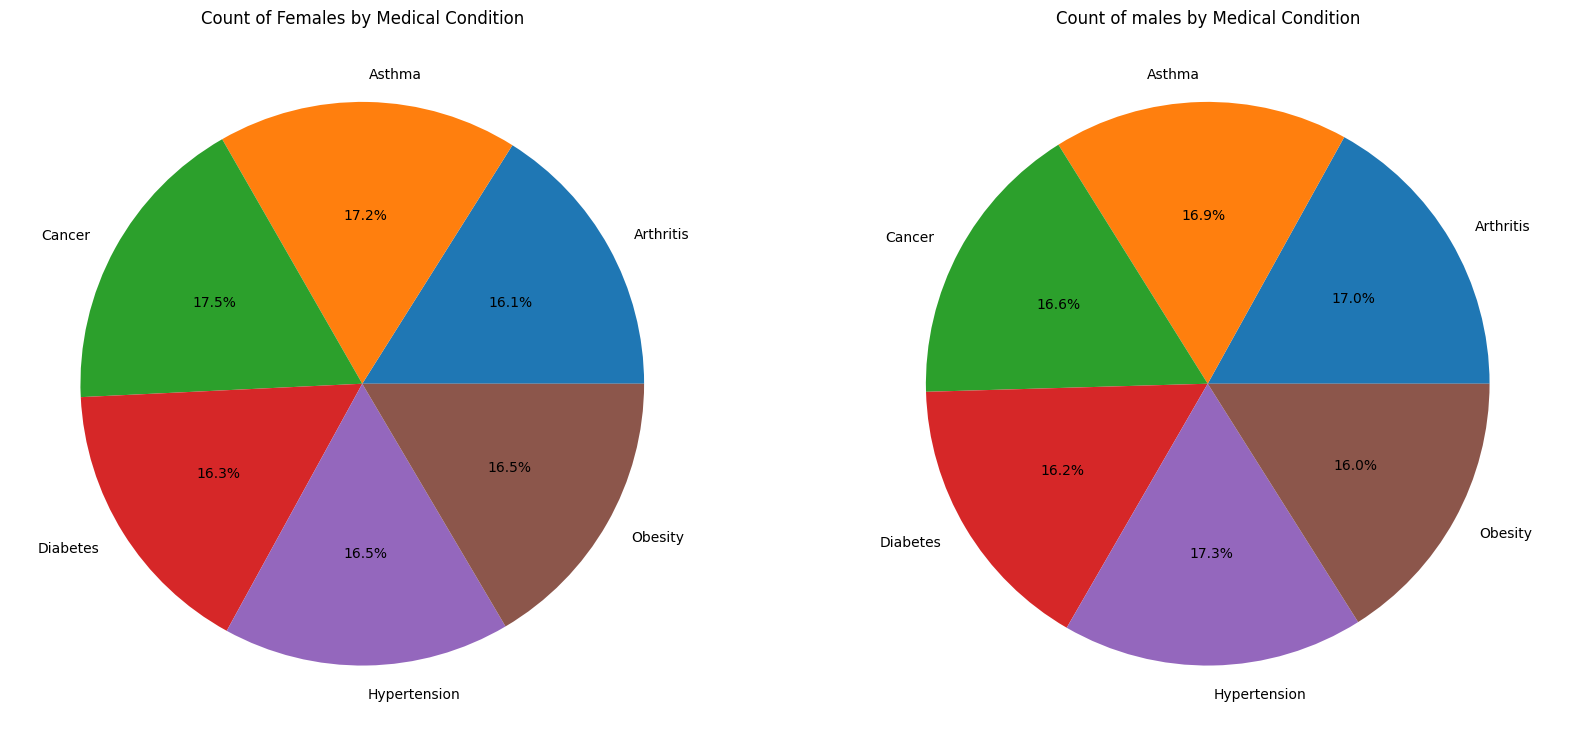

In [ ]:
# Subplots:

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Arthritis Pie Chart:

ax[0].pie(medical_condition_gender['Female_Count'], labels= medical_condition_gender['Medical_Condition'], autopct='%1.1f%%')

ax[0].set_title('Count of Females by Medical Condition')

ax[1].pie(medical_condition_gender['Male_Count'], labels= medical_condition_gender['Medical_Condition'], autopct='%1.1f%%')

ax[1].set_title('Count of males by Medical Condition')

###Conclusion:

The pie charts display the distribution of medical conditions among female and male patients. For both genders, the distribution is fairly similar, with Asthma, Cancer, and Arthritis making up significant portions of the charts. Diabetes, Hypertension, and Obesity also represent notable segments.

Count of Females by Medical Condition: Asthma appears to be slightly more prevalent among female patients compared to other conditions, followed closely by Cancer and Arthritis.

Count of Males by Medical Condition: Cancer constitutes a slightly larger segment among male patients, with Asthma and Arthritis also being prominent.

These visualizations highlight that certain medical conditions are common across both genders within the dataset, with no single condition overwhelming the distribution. The information could be valuable in understanding gender-specific prevalence and in developing targeted health interventions for these conditions.

In [ ]:
# Top 20 billing amount sum of hospitals:

query = """
SELECT Hospital, SUM(Billing_Amount) as Total_Billing
FROM df
GROUP BY Hospital
ORDER BY Total_Billing DESC LIMIT 20;
"""
total_billing_per_hospital = ps.sqldf(query, locals())

print(total_billing_per_hospital)


             Hospital  Total_Billing
0      Smith and Sons  477638.881124
1           Smith PLC  432283.548554
2           Smith Ltd  428163.073062
3           Smith Inc  351463.888372
4        Williams LLC  327522.472644
5        Thomas Group  327045.374505
6         Johnson Ltd  305971.192470
7      Davis and Sons  293452.520353
8           Jones Inc  290351.193848
9           Brown LLC  284695.674489
10        Johnson PLC  269777.542385
11          Jones LLC  264089.796020
12     Williams Group  258444.925381
13       Williams Ltd  251669.726520
14        Smith Group  247635.075637
15         Garcia Inc  245942.936144
16       Williams Inc  245434.300373
17  Williams and Sons  239355.500073
18         Thomas Inc  228995.495535
19    Miller and Sons  219201.284849


###Conclusion:


The data represents the top 20 hospitals in terms of total billing amount. Smith and Sons leads with the highest total billing of approximately \$477,638.88. Smith PLC and Smith Ltd also have high billing totals, with \$432,283.55 and \$428,163.07 respectively. This is followed by other entities such as Smith Inc, Williams LLC, and Thomas Group, all with total billings ranging from around \$327,000 to \$351,000.

These figures could be reflective of a variety of factors, including the number of patients treated, the complexity of cases, the types of treatments and procedures provided, or the cost structure of each hospital. The presence of multiple hospitals with 'Smith' and 'Williams' in their names suggests they may be part of larger hospital chains or networks, potentially accounting for their high billing volumes.

## Plot:

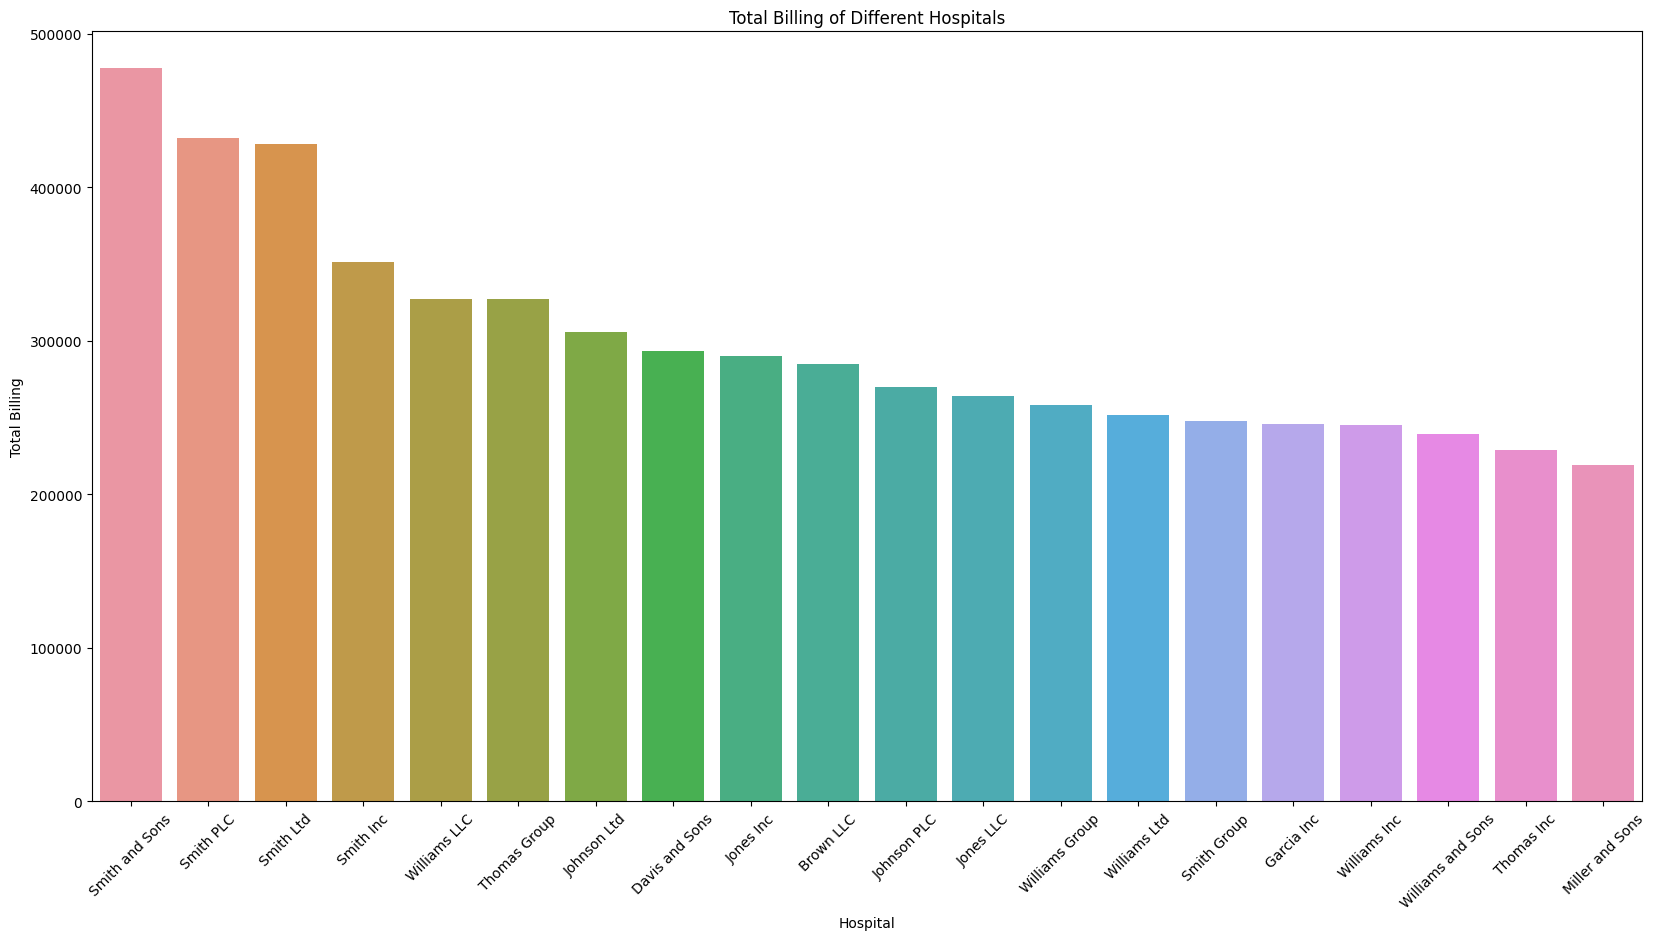

In [ ]:
plt.figure(figsize=(20, 10))

sns.barplot(x = 'Hospital', y = 'Total_Billing', data = total_billing_per_hospital )

plt.title('Total Billing of Different Hospitals')

plt.xlabel('Hospital')

plt.ylabel('Total Billing')

plt.xticks(rotation = 45)

plt.show()

###Conclusion:

The bar chart provides a visual representation of the total billing amounts for the top 20 hospitals. Smith and Sons have the highest total billing, with the chart showing a descending order of total billing amounts for the subsequent hospitals. The graph demonstrates a clear disparity in billing amounts, with a steep decline from the highest billing hospital to the twentieth. This could reflect differences in the size of the hospitals, the volume of patients served, the complexity or cost of treatments offered, or a combination of these factors. The chart effectively communicates the financial scale of operations across these various healthcare providers.

In [ ]:
# Average billing amounts of different admission types:

query = """
SELECT Admission_Type, AVG(Billing_Amount) as Average_Billing
FROM df
GROUP BY Admission_Type
ORDER BY Average_Billing DESC;
"""
billing_by_admission_type = ps.sqldf(query, locals())

print(billing_by_admission_type)

  Admission_Type  Average_Billing
0         Urgent     25960.833557
1       Elective     25891.832668
2      Emergency     24708.511933


###Conclusion:

The data indicates that the average billing amount for 'Urgent' admission types is the highest at \$25,960.83. 'Elective' admissions follow closely with an average billing of \$25,891.83, while 'Emergency' admissions have a lower average billing of \$24,708.51. This suggests that, on average, urgent and elective admissions may involve more costly treatments or longer hospital stays than emergency admissions. It's interesting to note that elective procedures, which are typically planned in advance, have almost as high of an average billing as urgent admissions, which are usually unexpected and require immediate care.

## Plot:

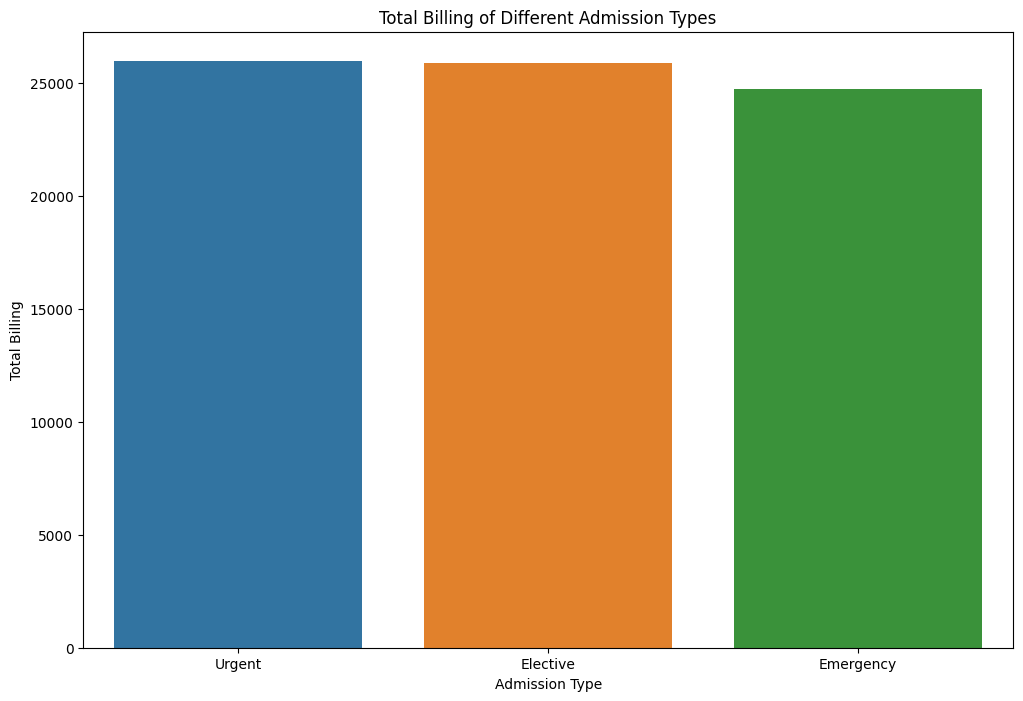

In [ ]:
plt.figure(figsize=(12, 8))

sns.barplot(x = 'Admission_Type', y = 'Average_Billing', data = billing_by_admission_type)

plt.title('Total Billing of Different Admission Types')

plt.xlabel('Admission Type')

plt.ylabel('Total Billing')

#plt.xticks(rotation = 45)

plt.show()

###Conclusion:


The bar chart illustrates the average billing amounts for different admission types: Urgent, Elective, and Emergency. Urgent admissions have the highest average billing, followed closely by Elective admissions, with Emergency admissions having the lowest average billing among the three. This visualization aids in comprehending the potential financial implications associated with the urgency of medical care. It suggests that Urgent and Elective care, which may involve planned procedures or immediate, unplanned interventions, can incur higher costs compared to Emergency admissions, which might be expected to be more due to the acute nature of the care provided.

In [ ]:
# Billing amount per year:

query = """
SELECT strftime('%Y', Admission_date) as Year, AVG(Billing_Amount) as Average_Billing
FROM df
GROUP BY Year
ORDER BY Year;
"""
billing_trends_over_time = ps.sqldf(query, locals())

print(billing_trends_over_time)


   Year  Average_Billing
0  2018     24828.796118
1  2019     25392.181691
2  2020     25820.161465
3  2021     25413.219396
4  2022     25828.321505
5  2023     25160.776670


###Conclusion:

The data shows the average billing amount per year from 2018 to 2023. There is a general upward trend in the average billing amount from 2018 (\$24,828.80) to 2020 (\$25,820.16), suggesting an increase in healthcare costs over time. However, there's a slight dip in 2021 (\$25,413.22) before the average billing amount increases again in 2022 (\$25,828.32). In 2023, there's a noticeable decrease to \$25,160.78. This fluctuation in billing could be due to various factors, such as changes in healthcare policies, the cost of medical procedures, the types of admissions, or overall changes in healthcare service utilization.

## Plot:

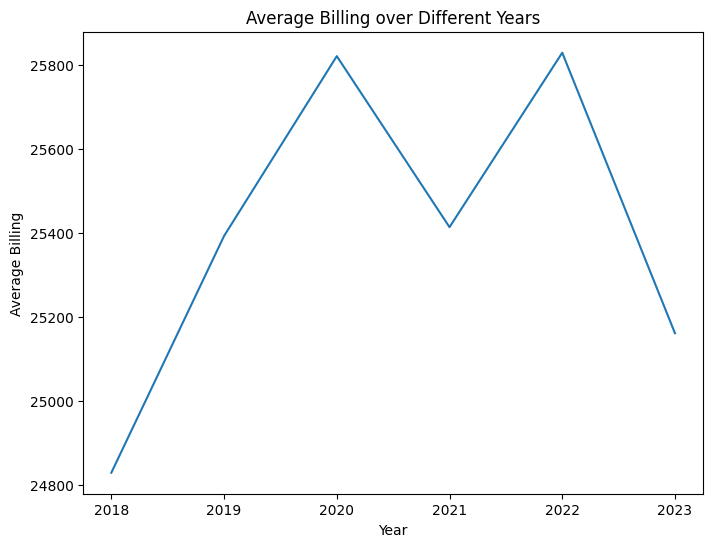

In [ ]:
plt.figure(figsize=(8, 6))

sns.lineplot(x = 'Year', y = 'Average_Billing', data = billing_trends_over_time)

plt.title('Average Billing over Different Years')

plt.xlabel('Year')

plt.ylabel('Average Billing')

plt.show()

###Conclusion:

The line chart illustrates the trend of average billing over different years from 2018 to 2023. There's an initial increase from 2018 to 2020, where the average billing peaks. Following 2020, there is a dip in 2021 and a subsequent rise in 2022, with a sharp decline in 2023. This visual representation clearly shows the fluctuations in average billing amounts over the years, suggesting variability in healthcare costs that could be influenced by a range of economic and healthcare-related factors. The trend indicates that while there was a general increase in the cost of healthcare services over the initial years, there has been a recent downturn in the average cost.

## Doctor and Hospital Service Analysis:

In [ ]:
# Top 20 Doctors by Patient Count:

query = """
SELECT Doctor, COUNT(*) as Total_Patients
FROM df
GROUP BY Doctor
ORDER BY Total_Patients DESC LIMIT 20;
"""
count = ps.sqldf(query, locals())

print(count)

               Doctor  Total_Patients
0     Michael Johnson               7
1        Robert Brown               5
2   Michelle Anderson               5
3       Michael Smith               5
4       Matthew Smith               5
5      Jennifer Smith               5
6      James Williams               5
7         James Perez               5
8   William Rodriguez               4
9       Robert Miller               4
10      Michael Brown               4
11      David Johnson               4
12  Christopher Jones               4
13  Christopher Davis               4
14     Ashley Jackson               4
15        William Lee               3
16    William Alvarez               3
17  Timothy Rodriguez               3
18       Thomas Brown               3
19      Stephen Jones               3


###Conclusion:

The data shows the top 20 doctors by patient count within the dataset. Michael Johnson leads with the highest patient count at 7. Several doctors, including Robert Brown, Michelle Anderson, Michael Smith, Matthew Smith, Jennifer Smith, James Williams, and James Perez, are tied with 5 patients each. A group of doctors including William Rodriguez, Robert Miller, Michael Brown, David Johnson, Christopher Jones, Christopher Davis, and Ashley Jackson each have treated 4 patients. At the bottom of the top 20, William Lee, William Alvarez, Timothy Rodriguez, Thomas Brown, and Stephen Jones each have 3 patients. This list could indicate doctors with high patient volumes or those who specialize in conditions that are common within the dataset.

## Plot:

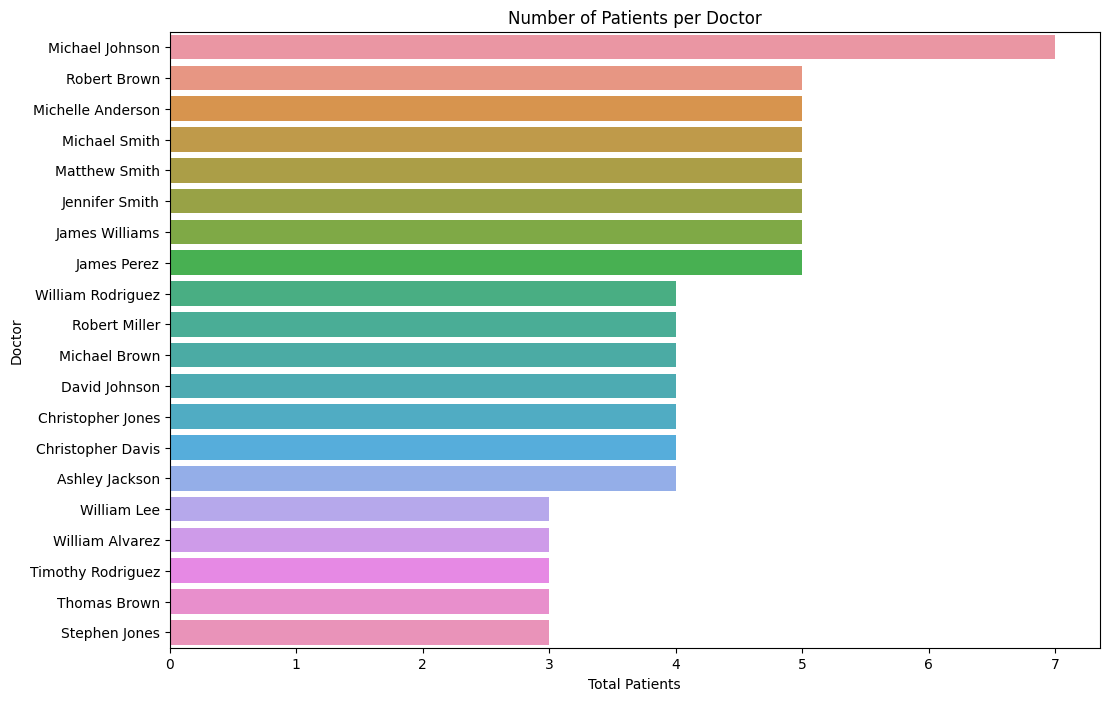

In [ ]:
plt.figure(figsize=(12, 8))

sns.barplot(x="Total_Patients", y="Doctor", data=count)

plt.title("Number of Patients per Doctor")

plt.xlabel("Total Patients")

plt.ylabel("Doctor")

plt.show()

###Conclusion:

The bar chart provides a clear representation of the number of patients treated by the top 20 doctors. Michael Johnson leads with 7 patients, while a group of doctors follow with 5 patients each. The distribution is relatively even among these top providers, with no single doctor overwhelmingly outpacing the others in patient volume. This could indicate a balanced workload or a similar number of cases handled by each doctor within the dataset. Such data is valuable for assessing the distribution of patient care among medical staff and for potential resource allocation or scheduling adjustments.

In [ ]:
# Average Billing amount of each doctor:

query = """
SELECT Doctor, AVG(Billing_Amount) as Average_Billing
FROM df
GROUP BY Doctor
ORDER BY Average_Billing DESC LIMIT 20;
"""
average_billing = ps.sqldf(query, locals())

print(average_billing)


               Doctor  Average_Billing
0     Timothy Serrano     49995.902283
1         Joseph Rice     49994.984740
2         Aaron Mills     49985.973068
3     Alice Gross DVM     49974.806592
4       Rebecca Parks     49974.299138
5   Zachary Castaneda     49974.160458
6       Matthew Lewis     49957.997600
7        Travis Gibbs     49954.968325
8          Dawn Haley     49951.261761
9        Dennis Smith     49936.073748
10       Laurie Smith     49932.901816
11      Derrick Lopez     49930.031601
12         Anne Ellis     49929.798726
13      Jessica White     49921.373365
14      Denise Conley     49909.182206
15    Tonya Rodriguez     49904.302118
16      Melissa Moyer     49900.083511
17     Spencer Bowman     49898.927543
18    Andrea Campbell     49898.208277
19        John Adkins     49891.402385


###Conclusion:

The data lists the top 20 doctors with the highest average billing amounts for their patients. Timothy Serrano ranks at the top with an average billing of approximately $49,995.90. Joseph Rice is a close second with an average billing of $49,994.98, followed by Aaron Mills at $49,985.97. All doctors on the list have average billings within the $49,000 range, indicating that their treatment costs are relatively high compared to other doctors in the dataset.

These high average billings could be due to a variety of factors such as the complexity of the medical cases they handle, the types of procedures they perform, or their specialization in high-cost medical areas.

In [ ]:
# Most common medical conditions treated by doctors:

query = """
SELECT Doctor, Medical_Condition, COUNT(*) as count
FROM df
GROUP BY Doctor, Medical_Condition
ORDER BY Doctor, count DESC LIMIT 20;
"""
condition_by_doctor = ps.sqldf(query, locals())
print(condition_by_doctor)


               Doctor Medical_Condition  count
0      Aaron Anderson      Hypertension      1
1       Aaron Barrera         Arthritis      1
2         Aaron Boone      Hypertension      1
3        Aaron Brewer            Asthma      1
4         Aaron Brown            Asthma      1
5         Aaron Bruce          Diabetes      1
6       Aaron Burnett         Arthritis      1
7    Aaron Cameron MD            Asthma      1
8   Aaron Christensen           Obesity      1
9      Aaron Gonzalez          Diabetes      1
10       Aaron Graves      Hypertension      1
11         Aaron Hall            Cancer      1
12         Aaron Hill      Hypertension      1
13      Aaron Houston            Cancer      1
14      Aaron Johnson         Arthritis      1
15        Aaron Jones          Diabetes      1
16       Aaron Joseph      Hypertension      1
17     Aaron Martinez          Diabetes      1
18        Aaron Mills         Arthritis      1
19       Aaron Nelson      Hypertension      1


###Conclusion:

The data indicates the most common medical conditions treated by different doctors within the dataset, although all counts are equal to 1 for each doctor-condition pair in this top 20 list. This could suggest that the dataset is either very evenly distributed among different conditions for these doctors, or that the dataset size for each doctor is quite small, allowing only for a single condition to be represented per doctor in this list.

Hypertension, Arthritis, Asthma, Diabetes, and Obesity appear as the conditions treated by these doctors. Due to the equal count of 1 for each condition per doctor, we cannot determine a most common condition treated overall from this data alone. To get a more comprehensive picture, the query would need to be adjusted to include all doctors or to remove the limit of 20 to see if any patterns emerge with higher counts.

In [ ]:
# Printing the first 20 enteries' Admission types:

query = """
SELECT Hospital, Admission_Type, COUNT(*) as Admission_Count
FROM df
GROUP BY Hospital, Admission_Type
ORDER BY Hospital, Admission_Count DESC LIMIT 20;
"""
admission_type_hospital = ps.sqldf(query, locals())

print(admission_type_hospital)


                         Hospital Admission_Type  Admission_Count
0                      Abbott Inc       Elective                1
1                      Abbott LLC         Urgent                1
2                      Abbott LLC       Elective                1
3                      Abbott PLC      Emergency                1
4         Abbott, Curry and Moore       Elective                1
5                   Abbott-Jordan      Emergency                1
6                 Abbott-Phillips      Emergency                1
7                     Abbott-Shea      Emergency                1
8                     Acevedo LLC      Emergency                1
9                Acevedo and Sons         Urgent                1
10       Acevedo, Rojas and Smith      Emergency                1
11                     Acosta PLC       Elective                1
12                Acosta and Sons         Urgent                1
13  Acosta, Saunders and Thompson         Urgent                1
14   Acost

###Conclusion:


The data lists the first 20 entries of admission types for various hospitals. It shows that elective admissions and urgent admissions are quite common across different hospitals, with emergency admissions also represented. Each entry indicates one admission count for the corresponding hospital and admission type. This suggests that the dataset might include a single record for each admission type at these hospitals, or it could be a subset of a larger dataset. Notably, Adams Group has the highest admission count in this subset, with 2 elective admissions and 1 urgent admission. The rest of the hospitals have one admission count for the specified admission type. This information could help in understanding the frequency of different admission types at these hospitals, albeit on a very small scale due to the limit of 20 entries.

In [ ]:
# Average length of stay in hospitals:

query = """
SELECT Hospital, AVG(JULIANDAY(Discharge_Date) - JULIANDAY(Admission_date)) as Average_Stay_Length
FROM df
GROUP BY Hospital
ORDER BY Average_Stay_Length DESC LIMIT 20;
"""
stay_length_hospital = ps.sqldf(query, locals())
print(stay_length_hospital)

                          Hospital  Average_Stay_Length
0         Young, Murphy and Daniel                 30.0
1           Young, Brooks and Rice                 30.0
2       Young, Ashley and Atkinson                 30.0
3                   Wright-Spencer                 30.0
4   Woodward, Mccullough and Perez                 30.0
5                    Winters-Braun                 30.0
6         Wilson, Pugh and Johnson                 30.0
7          Wilson, Lopez and Solis                 30.0
8          Wilson, Hobbs and Drake                 30.0
9       Wilson, Daniels and Hunter                 30.0
10    Williamson, Bradley and Hill                 30.0
11                  Williams-Boyer                 30.0
12  Williams, Velasquez and Hunter                 30.0
13      Williams, Poole and Martin                 30.0
14    Williams, Coleman and Moreno                 30.0
15                       West-Berg                 30.0
16     Watts, Williams and Jackson              

In [ ]:
# Test result patterns:

query = """
SELECT Hospital, Test_Results, COUNT(*) as n_Test_Result
FROM df
GROUP BY Hospital, Test_Results
ORDER BY Hospital, n_Test_Result DESC LIMIT 20;
"""
test_results_hospital = ps.sqldf(query, locals())

print(test_results_hospital)


                         Hospital  Test_Results  n_Test_Result
0                      Abbott Inc  Inconclusive              1
1                      Abbott LLC        Normal              1
2                      Abbott LLC      Abnormal              1
3                      Abbott PLC      Abnormal              1
4         Abbott, Curry and Moore  Inconclusive              1
5                   Abbott-Jordan  Inconclusive              1
6                 Abbott-Phillips        Normal              1
7                     Abbott-Shea      Abnormal              1
8                     Acevedo LLC  Inconclusive              1
9                Acevedo and Sons        Normal              1
10       Acevedo, Rojas and Smith        Normal              1
11                     Acosta PLC      Abnormal              1
12                Acosta and Sons        Normal              1
13  Acosta, Saunders and Thompson      Abnormal              1
14   Acosta, Thompson and Schultz  Inconclusive        

In [ ]:
# Number of test result patterns by hospitals:

query = """
SELECT Hospital, COUNT(*) as n_Test_Result
FROM df
GROUP BY Hospital
ORDER BY n_Test_Result DESC LIMIT 20;
"""
test_results_hospital = ps.sqldf(query, locals())

print(test_results_hospital)


           Hospital  n_Test_Result
0         Smith PLC             19
1    Smith and Sons             17
2         Smith Ltd             14
3         Smith Inc             14
4       Johnson PLC             13
5      Williams LLC             12
6      Williams Inc             12
7       Smith Group             12
8      Thomas Group             11
9       Johnson Ltd             11
10    Johnson Group             11
11        Brown LLC             10
12   Williams Group              9
13  Miller and Sons              9
14        Jones Ltd              9
15        Jones LLC              9
16        Jones Inc              9
17   Davis and Sons              9
18     Williams PLC              8
19     Williams Ltd              8


###Conclusion:

The data outlines the top 20 hospitals by the number of test results recorded. Smith PLC leads with a total of 19 test results, followed by Smith and Sons with 17, and both Smith Ltd and Smith Inc with 14 each. Johnson PLC and Williams LLC, as well as Williams Inc and Smith Group, have 13 and 12 test results respectively. Thomas Group, Johnson Ltd, and Johnson Group are reported to have 11 test results each. Lower down the list, Brown LLC has 10, while Williams Group, Miller and Sons, Jones Ltd, Jones LLC, Jones Inc, and Davis and Sons each have 9 test results recorded. Williams PLC and Williams Ltd round out the list with 8 test results each.

This data might indicate the volume of patient testing at these hospitals, or it could suggest the hospitals' capacity and focus on diagnostic services. It also points to the prevalence of certain hospital names like Smith, Williams, and Jones, which could signify larger networks or chains with multiple facilities.

In [ ]:
# Most Common Admission date of patients:

query = """
SELECT Admission_date, COUNT(*) as Frequency
FROM df
GROUP BY Admission_date
ORDER BY Frequency DESC
LIMIT 1;
"""
most_common_admission_date = ps.sqldf(query, locals())

print(most_common_admission_date)

  Admission_date  Frequency
0     2022-04-27         15


###Conclusion:

The most common admission date of patients is April 27, 2022. 15 patients have been admitted.

In [ ]:
# Most Common Discharge date of patients:

query = """
SELECT Discharge_Date, COUNT(*) as Frequency
FROM df
GROUP BY Discharge_Date
ORDER BY Frequency DESC
LIMIT 1;
"""
most_common_discharge_date = ps.sqldf(query, locals())

print(most_common_discharge_date)

  Discharge_Date  Frequency
0     2021-11-28         14


###Conclusion:

It can be observed that the most common discharge date of patients is November 28, 2021. 14 patients were discharged on this date.

In [ ]:
# Count of Insurance providers:

query = """
SELECT Insurance_Provider, COUNT(*) as Frequency_insurance
FROM df
GROUP BY Insurance_Provider
ORDER BY Frequency_insurance DESC;
"""
freq_insurance = ps.sqldf(query, locals())

print(freq_insurance)

  Insurance_Provider  Frequency_insurance
0              Cigna                 2040
1         Blue Cross                 2032
2              Aetna                 2025
3   UnitedHealthcare                 1978
4           Medicare                 1925


###Conclusion:

The data reveals the frequency of insurance providers among the patients in the dataset. Cigna is the most common insurance provider, covering 2,040 patients. Blue Cross is slightly less prevalent with 2,032 patients. Aetna covers 2,025 patients, while UnitedHealthcare is the provider for 1,978 patients. Medicare is listed for 1,925 patients, making it the least common among the top providers listed here.

This distribution might reflect the market share of these insurance companies within the region or demographic from which the data was collected. It also indicates a relatively even distribution of patients across these major insurance providers.

## Plot:

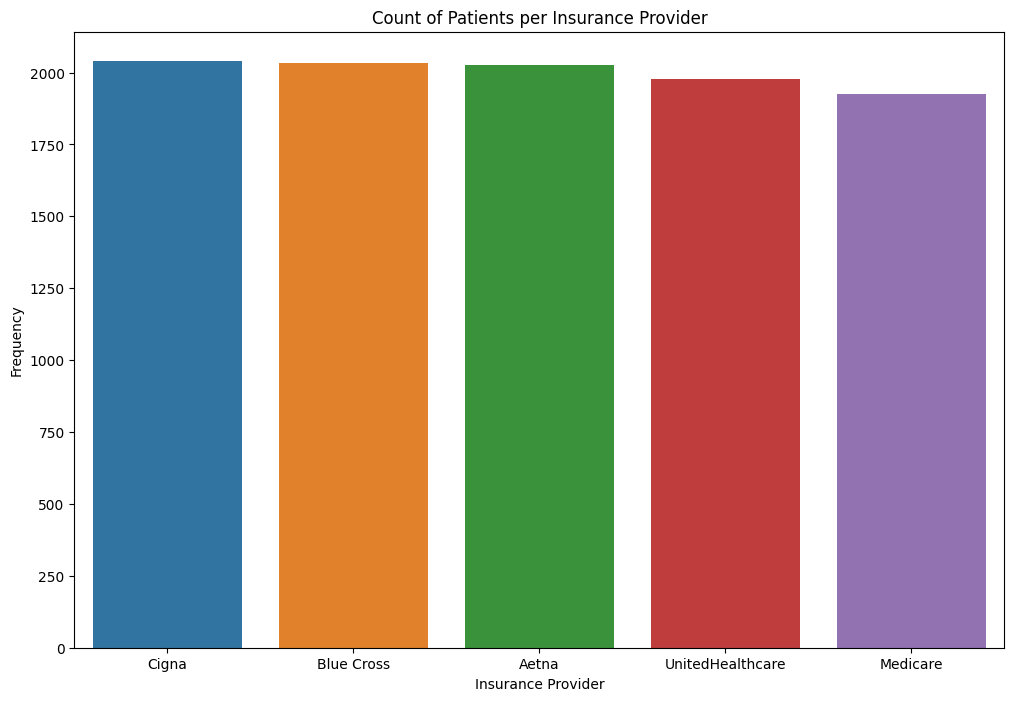

In [ ]:
plt.figure(figsize=(12, 8))

sns.barplot(x= 'Insurance_Provider', y= 'Frequency_insurance', data= freq_insurance)

plt.title("Count of Patients per Insurance Provider")

plt.xlabel("Insurance Provider")

plt.ylabel("Frequency")

plt.show()

In [ ]:
# Distribution of Insurance providers among different genders:

query = """
SELECT Insurance_Provider,
SUM(CASE WHEN Gender = 'Female' THEN 1 ELSE 0 END) AS Female_Count,
SUM(CASE WHEN Gender = 'Male' THEN 1 ELSE 0 END) AS Male_Count
FROM df
GROUP BY Insurance_Provider
ORDER BY Insurance_Provider;
"""
freq1_insurance = ps.sqldf(query, locals())

print(freq1_insurance)

  Insurance_Provider  Female_Count  Male_Count
0              Aetna          1012        1013
1         Blue Cross           985        1047
2              Cigna          1034        1006
3           Medicare          1035         890
4   UnitedHealthcare          1009         969


## Plot:

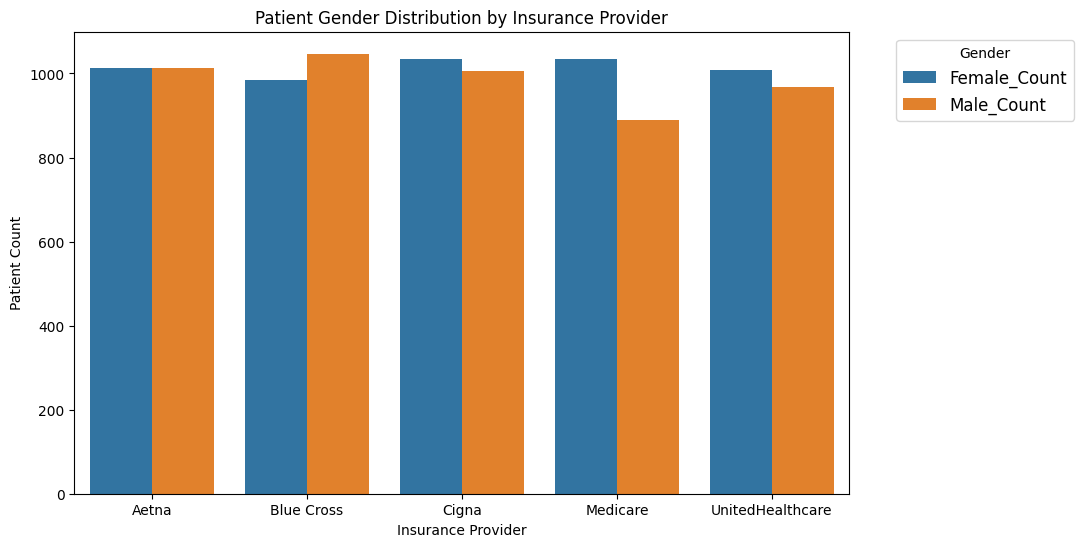

In [ ]:
df_melted = freq1_insurance.melt(id_vars='Insurance_Provider', value_vars=['Female_Count', 'Male_Count'],
                                var_name='Gender', value_name='Count')

# Plot:

plt.figure(figsize=(10, 6))

sns.barplot(data=df_melted, x='Insurance_Provider', y='Count', hue='Gender')

plt.title('Patient Gender Distribution by Insurance Provider')

plt.xlabel('Insurance Provider')

plt.ylabel('Patient Count')

plt.legend(title='Gender', fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

###Conclusion:


The bar chart displays the patient gender distribution across different insurance providers. The providers shown are Aetna, Blue Cross, Cigna, Medicare, and UnitedHealthcare. For each insurance provider, the count of female and male patients is represented by different colored bars.

From the visualization, it appears that the distribution between female and male patients is relatively balanced for each insurance provider. Some providers have a slightly higher count of one gender over the other, but there is no significant disparity overall. This could suggest that the insurance coverage is fairly distributed among genders within the patient population of this dataset.

The chart effectively communicates the gender demographics of patients with different insurers, which can be important for analyzing healthcare access and utilization patterns by gender.

In [ ]:
# Distribution of Insurance providers among different medical conditions:

query = """
SELECT Insurance_Provider, Medical_Condition, COUNT(*) as Frequency_insurance
FROM df
GROUP BY Insurance_Provider, Medical_Condition
ORDER BY Insurance_Provider ASC;
"""
freq2_insurance = ps.sqldf(query, locals())

print(freq2_insurance)

   Insurance_Provider Medical_Condition  Frequency_insurance
0               Aetna         Arthritis                  308
1               Aetna            Asthma                  368
2               Aetna            Cancer                  362
3               Aetna          Diabetes                  324
4               Aetna      Hypertension                  348
5               Aetna           Obesity                  315
6          Blue Cross         Arthritis                  348
7          Blue Cross            Asthma                  368
8          Blue Cross            Cancer                  316
9          Blue Cross          Diabetes                  339
10         Blue Cross      Hypertension                  322
11         Blue Cross           Obesity                  339
12              Cigna         Arthritis                  349
13              Cigna            Asthma                  340
14              Cigna            Cancer                  358
15              Cigna   

###Conclusion:

The data shows the distribution of insurance providers among different medical conditions. Each insurance provider covers a range of medical conditions with varying frequencies.

Aetna covers a high number of asthma cases (368), followed closely by cancer (362) and hypertension (348).
Blue Cross has a more balanced distribution among arthritis (348), asthma (368), and obesity (339) but fewer cancer cases (316).
Cigna has the highest coverage for arthritis (349) and hypertension (356), with slightly fewer cases in other conditions.
Medicare provides coverage across all conditions, with hypertension (336) and diabetes (327) being the most frequent.
UnitedHealthcare also shows a balanced distribution but leads in cancer coverage (349) and has slightly lower counts in asthma (322).
This distribution may reflect the healthcare needs of the insured population and the prevalence of these conditions among different insurers' client bases. It could also be influenced by the particular health plans that each insurance provider offers, which may be more or less attractive to individuals with certain medical conditions.

## Plot:

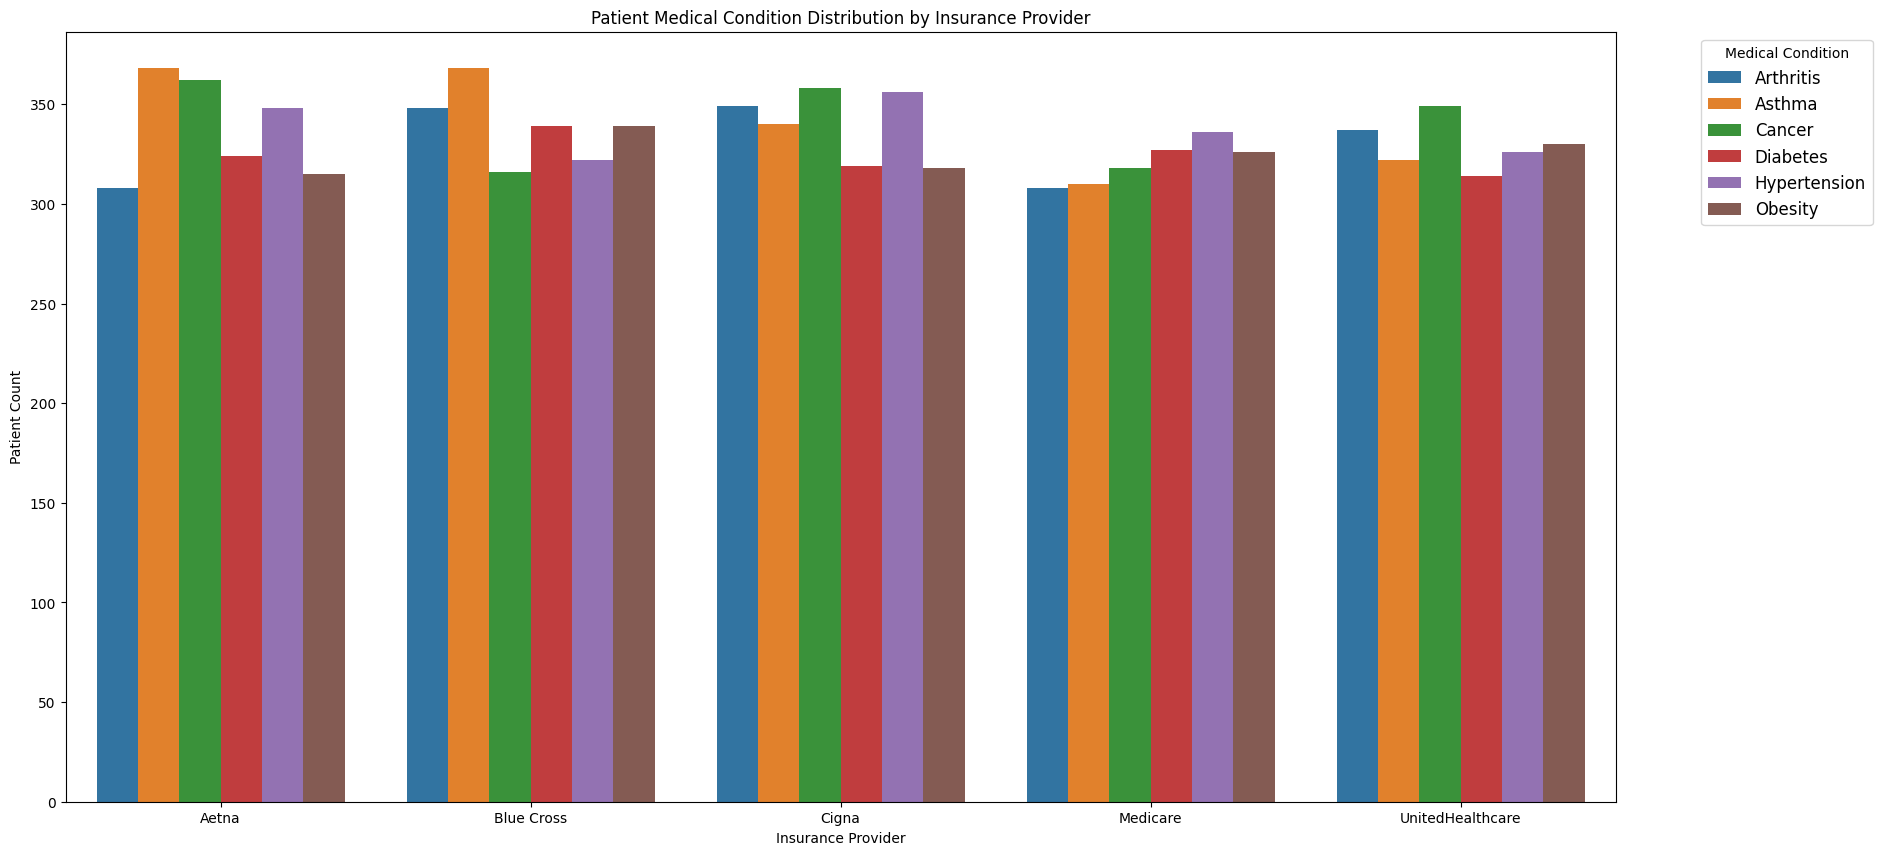

In [ ]:
plt.figure(figsize=(20, 10))

sns.barplot(x='Insurance_Provider', y='Frequency_insurance', hue='Medical_Condition', data = freq2_insurance)

plt.title('Patient Medical Condition Distribution by Insurance Provider')

plt.xlabel('Insurance Provider')

plt.ylabel('Patient Count')

plt.legend(title='Medical Condition', fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

###Conclusion:

The visual analysis of the data shows the distribution of patients with various medical conditions covered by different insurance providers:

Aetna: The distribution is fairly even across conditions, with a slightly higher frequency for asthma.

Blue Cross: They show a significant number of patients with asthma and arthritis, but fewer cancer patients.

Cigna: The coverage is fairly even, with a slightly higher frequency for arthritis and hypertension.

Medicare: Coverage is spread evenly across all conditions, with slight peaks in diabetes and hypertension.

UnitedHealthcare: This provider has a relatively even spread of conditions, with cancer being the most frequent.

This information could be useful for insurance providers to analyze the healthcare needs of their policyholders and potentially adjust plans and premiums accordingly. It also provides insight into which conditions are more prevalent or more often claimed within each insurance provider's patient pool.

## NLP Chatbot using GPT-Neo 125M from EleutherAI:

In [ ]:
from transformers import pipeline
generator = pipeline('text-generation', model='EleutherAI/gpt-neo-125M')
generator("EleutherAI has", do_sample=True, min_length=50)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1355: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1380: UserWarning: Unfeasible length constraints: `min

[{'generated_text': 'EleutherAI has announced yet another set of AI tools to make AI less intimidating, and is doing'}]

In [ ]:
patient_info = df[df['Name'] == 'Antonio Frederick']
patient_query = f"Patient Name: Antonio Frederick, Age: {patient_info['Age'].iloc[0]}, Gender: {patient_info['Gender'].iloc[0]}, Blood Type:  {patient_info['Blood_Type'].iloc[0]}, Medical Condition: {patient_info['Medical_Condition'].iloc[0]}, Doctor:  {patient_info['Doctor'].iloc[0]}, Insurance Provider:  {patient_info['Insurance_Provider'].iloc[0]}"

In [ ]:
prompt = f"Based on the patient record: {patient_query}"
response = generator(prompt, do_sample=True, min_length=50)
print(response[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1355: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1363: UserWarning: Input length of input_ids is 43, but `max_length` is set to 20. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1380: UserWarning: Unfeasible length constraints: `min_length` (50) is larger than the maximum possible length (20). Generation will stop at the defined maximum length. You should decrease the minimum length and/or increase the maximum length. Note that `max_length` is set to 20, its default value.
  warnings.wa

Based on the patient record: Patient Name: Antonio Frederick, Age: 49, Gender: Male, Blood Type:  B-, Medical Condition: Asthma, Doctor:  Brian Chandler, Insurance Provider:  Medicare Insurance
